In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
data_play=pd.read_csv(r'C:\Users\MizgaanMasani\Downloads\Prac_Missing_data.csv\data.csv')

In [5]:
data_play.describe()

,row_id,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
count,1000000.000000,981603.000000,981784.000000,981992.000000,981750.000000,981678.000000,981911.000000,981867.000000,981872.000000,981838.000000,...,981937.000000,981675.000000,981986.000000,981824.000000,981735.000000,981775.000000,981881.000000,981694.000000,982005.000000,981733.000000
mean,499999.500000,-0.000687,0.002091,0.000551,0.000982,0.002437,0.000635,-0.000124,-0.063857,-0.000014,...,0.335968,0.003773,0.334433,-0.071842,-0.079854,0.038282,0.551900,0.333509,0.330047,0.037223
std,288675.278932,1.000784,0.999878,0.999825,0.999847,1.001151,0.999927,1.000427,0.725986,1.000715,...,2.352749,2.292272,2.358757,0.777855,0.806965,0.706913,4.996632,2.383485,2.364036,0.776354
min,0.000000,-4.664447,-4.790594,-4.870645,-5.053023,-5.363454,-5.508223,-5.199170,-6.990302,-4.566593,...,-12.536923,-11.132350,-11.677862,-10.091950,-9.864310,-10.353951,-26.276588,-11.524137,-10.661978,-9.983739
25%,249999.750000,-0.674667,-0.672283,-0.673783,-0.672211,-0.672326,-0.673884,-0.674834,-0.500305,-0.674006,...,-1.266885,-1.570766,-1.224468,-0.517559,-0.576799,-0.385768,-2.791428,-1.268732,-1.298927,-0.396043
50%,499999.500000,-0.000769,0.002049,0.001386,0.000370,0.002733,0.000276,0.000814,0.000578,-0.000047,...,0.303320,-0.071800,0.379014,0.018222,-0.027811,0.102679,0.203056,0.354137,0.295049,0.131245
75%,749999.250000,0.673181,0.675997,0.674490,0.674852,0.676588,0.675951,0.673983,0.444337,0.674295,...,1.917695,1.521134,1.925968,0.474557,0.480100,0.529550,3.646324,1.947385,1.916931,0.574182
max,999999.000000,5.039177,5.042807,5.130025,5.462472,4.856916,4.960724,4.957977,2.527570,4.886075,...,13.539926,11.524512,12.536151,2.607285,2.814969,2.548404,31.229363,11.341926,11.901409,2.584492


In [6]:
data_play.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 81 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   row_id  1000000 non-null  int64  
 1   F_1_0   981603 non-null   float64
 2   F_1_1   981784 non-null   float64
 3   F_1_2   981992 non-null   float64
 4   F_1_3   981750 non-null   float64
 5   F_1_4   981678 non-null   float64
 6   F_1_5   981911 non-null   float64
 7   F_1_6   981867 non-null   float64
 8   F_1_7   981872 non-null   float64
 9   F_1_8   981838 non-null   float64
 10  F_1_9   981751 non-null   float64
 11  F_1_10  982039 non-null   float64
 12  F_1_11  981830 non-null   float64
 13  F_1_12  981797 non-null   float64
 14  F_1_13  981602 non-null   float64
 15  F_1_14  981961 non-null   float64
 16  F_2_0   1000000 non-null  int64  
 17  F_2_1   1000000 non-null  int64  
 18  F_2_2   1000000 non-null  int64  
 19  F_2_3   1000000 non-null  int64  
 20  F_2_4   1000000 non-null 

In [9]:
data_play.shape

(1000000, 81)

In [7]:
data_cpy=data_play.copy()

In [10]:
data_play.head()

,row_id,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
0,0,-0.354591,-0.464038,2.304115,0.734486,1.696395,0.136285,-0.518344,0.502640,-1.852504,...,3.744152,0.794438,0.265185,-0.561809,0.196480,0.373434,6.206995,3.809505,1.236486,1.182055
1,1,1.380940,-0.499626,-0.418548,1.911725,-0.826130,-1.715371,-0.577091,-1.041486,0.596067,...,-2.895826,-0.738275,2.361818,-0.060753,0.727249,-0.271882,5.232157,-4.218259,-2.724883,-0.063775
2,2,0.256023,-1.059874,NaN,0.345678,1.513814,1.243864,-0.509648,-0.800481,-0.115945,...,2.252834,0.472496,2.491386,0.353381,-0.260682,-0.000833,-0.116457,-2.131747,3.661499,-0.131576
3,3,-0.728420,-2.432399,-2.453602,-0.020509,0.333397,0.086049,-1.787601,0.667011,0.761564,...,2.004600,-4.664806,-0.847211,-0.264249,0.664334,-0.557868,8.499483,-4.738799,-3.054611,0.494152
4,4,0.590212,-0.066127,0.468009,-1.096038,0.119399,-1.809710,0.466358,-0.053196,-0.580320,...,0.976937,2.558883,3.377724,0.846891,0.696032,0.554121,-5.979714,-2.869631,3.733057,-0.722943


In [11]:
# df_feature_null
# (data_play['F_3_6'].isnull().sum()/1000000)
1-(data_play['F_3_6'].notnull().sum()/1000000)

0.018191999999999986

In [12]:
np.round(data_play['F_3_6'].isnull().mean(),4)

0.0182

###  Checking the Missing values 

In [13]:
# Here we will check the null values present in each feature


df_feature_null=[feat for feat in data_play.columns if data_play[feat].isnull().sum()>1]
print(f'No. Of feature have Missing Values are:-  {len(df_feature_null)}')
# Checking the feature name and percentage of  missing values

if len(df_feature_null)!=0:
    for feat in df_feature_null:
        print(f'Feature :- {feat} is having {np.round(data_play[feat].isnull().mean(),4)} % of Missing values')
    
else:
    print('There are No Missing Values')
    

No. Of feature have Missing Values are:-  55
Feature :- F_1_0 is having 0.0184 % of Missing values
Feature :- F_1_1 is having 0.0182 % of Missing values
Feature :- F_1_2 is having 0.018 % of Missing values
Feature :- F_1_3 is having 0.0182 % of Missing values
Feature :- F_1_4 is having 0.0183 % of Missing values
Feature :- F_1_5 is having 0.0181 % of Missing values
Feature :- F_1_6 is having 0.0181 % of Missing values
Feature :- F_1_7 is having 0.0181 % of Missing values
Feature :- F_1_8 is having 0.0182 % of Missing values
Feature :- F_1_9 is having 0.0182 % of Missing values
Feature :- F_1_10 is having 0.018 % of Missing values
Feature :- F_1_11 is having 0.0182 % of Missing values
Feature :- F_1_12 is having 0.0182 % of Missing values
Feature :- F_1_13 is having 0.0184 % of Missing values
Feature :- F_1_14 is having 0.018 % of Missing values
Feature :- F_3_0 is having 0.018 % of Missing values
Feature :- F_3_1 is having 0.0183 % of Missing values
Feature :- F_3_2 is having 0.0181 % 

In [14]:
# 1-(981603/1000000)

##  Checking the Total Numbers of Numerical Features

In [15]:
df_numeric=[feat for feat in data_play.columns if data_play[feat].dtypes !='O' ]
print(f'No. Of Numerical Features are :- {len(df_numeric)}')
data_num=data_play[df_numeric].copy()

No. Of Numerical Features are :- 81


## Checking total number of Categorical Features

In [9]:
df_categorical=[feat for feat in data_play.columns if data_play[feat].dtypes =='O' ]
print(f'No. Of Categorical Features are :- {len(df_categorical)}')
data_cat=data_play[df_categorical].copy()

No. Of Categorical Features are :- 0


## Handling Missing value

#### techniques:- fillna method
####                       Interpolation
####                       dropna
####                      

In [21]:
# sns.heatmap(data_play[data_num].corr(),annot=True)

In [12]:
[data_play[['F_1_0','F_1_1']]]

[           F_1_0     F_1_1
 0      -0.354591 -0.464038
 1       1.380940 -0.499626
 2       0.256023 -1.059874
 3      -0.728420 -2.432399
 4       0.590212 -0.066127
 ...          ...       ...
 999995 -0.823740  0.285673
 999996 -0.769106 -0.387363
 999997  0.147534 -0.715276
 999998 -1.709886 -0.813785
 999999 -0.806380 -0.025251
 
 [1000000 rows x 2 columns]]

In [35]:
data_play[data_play['F_1_0'].isnull()]

,row_id,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
21,21,NaN,0.597360,0.705077,-0.357132,-0.269956,-1.544543,1.125272,-1.132574,-0.469205,...,1.999601,0.120454,3.293806,NaN,0.244227,0.417275,-0.498955,NaN,2.429264,-0.158679
128,128,NaN,1.641536,-0.213354,1.239404,-0.436346,0.562495,1.665719,0.138338,1.578783,...,1.095133,0.282954,-1.459037,0.087052,-0.567476,0.361486,5.706773,0.213604,-1.791896,0.830542
182,182,NaN,-1.528396,-2.195590,2.290170,-0.462880,0.304733,-0.444906,-0.230817,-0.025734,...,2.293028,1.647683,-5.252194,0.030415,-0.447424,1.319184,2.796865,0.919038,0.277656,0.251492
191,191,NaN,-1.663629,1.468326,-0.476825,0.108153,-0.246487,0.573162,-0.495359,NaN,...,4.398792,0.355058,-4.377217,-0.659138,-0.037753,0.214558,1.373314,3.272878,4.563252,0.442477
289,289,NaN,-1.460306,-0.235558,1.023098,1.072806,0.368809,2.652108,-0.068146,1.061812,...,0.697010,-2.836142,-1.193223,-0.029823,-0.075596,-1.517473,1.863806,-2.862912,-0.213043,0.271456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999843,999843,NaN,1.763385,-0.559983,1.233023,0.457989,0.067243,-2.513280,-2.084436,1.179466,...,-5.464340,-0.308162,-1.745641,0.765395,0.823551,1.006194,-8.186685,2.036628,-0.666406,0.850133
999869,999869,NaN,0.811696,-0.066675,-0.902973,1.282875,-1.763381,0.282150,-1.269154,-0.168817,...,-2.242310,-0.692896,-3.461160,-0.372706,0.438084,-0.143415,-5.013011,-0.789764,2.102945,-1.106991
999899,999899,NaN,-0.665007,-0.958795,0.270252,0.528475,0.293481,0.574542,NaN,0.472143,...,1.640436,-1.008224,3.513828,-1.185302,-0.303656,-0.152158,7.066438,-0.728743,0.002655,-0.644861
999931,999931,NaN,0.891625,0.082012,0.765157,-0.571789,-0.214620,0.038757,-0.366198,-0.175344,...,-1.860686,0.082790,-2.000092,0.101129,0.106514,-0.197857,-5.949049,3.489103,1.623965,-0.000910


In [15]:
data_play.fillna({'F_1_0':0.165,
           'F_1_1':,
           
           })

,row_id,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
0,0,-0.354591,-0.464038,2.304115,0.734486,1.696395,0.136285,-0.518344,0.502640,-1.852504,...,3.744152,0.794438,0.265185,-0.561809,0.196480,0.373434,6.206995,3.809505,1.236486,1.182055
1,1,1.380940,-0.499626,-0.418548,1.911725,-0.826130,-1.715371,-0.577091,-1.041486,0.596067,...,-2.895826,-0.738275,2.361818,-0.060753,0.727249,-0.271882,5.232157,-4.218259,-2.724883,-0.063775
2,2,0.256023,-1.059874,NaN,0.345678,1.513814,1.243864,-0.509648,-0.800481,-0.115945,...,2.252834,0.472496,2.491386,0.353381,-0.260682,-0.000833,-0.116457,-2.131747,3.661499,-0.131576
3,3,-0.728420,-2.432399,-2.453602,-0.020509,0.333397,0.086049,-1.787601,0.667011,0.761564,...,2.004600,-4.664806,-0.847211,-0.264249,0.664334,-0.557868,8.499483,-4.738799,-3.054611,0.494152
4,4,0.590212,-0.066127,0.468009,-1.096038,0.119399,-1.809710,0.466358,-0.053196,-0.580320,...,0.976937,2.558883,3.377724,0.846891,0.696032,0.554121,-5.979714,-2.869631,3.733057,-0.722943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,-0.823740,0.285673,0.343307,-0.436747,1.700549,-1.069432,0.819698,-0.168457,-0.429074,...,1.799592,-0.301352,5.339675,-0.991529,1.279494,-0.841051,-2.276500,1.762961,5.324553,-0.228733
999996,999996,-0.769106,-0.387363,-1.227469,0.601183,0.351161,0.219475,-0.530277,0.853452,0.608646,...,1.909697,-1.299360,-0.071713,-0.162173,0.072501,-0.614687,-1.265524,0.190385,-0.344112,-0.346807
999997,999997,0.147534,-0.715276,-0.465049,-1.988941,-1.594535,-1.044882,3.159455,-0.634108,0.890382,...,2.891854,3.105002,-3.470520,NaN,0.096988,0.569255,3.609790,-0.584108,-1.492096,-0.997502
999998,999998,-1.709886,-0.813785,-1.866536,-0.179420,2.231478,1.460122,-0.220585,-0.118496,-0.140064,...,-1.135003,-5.127360,-3.903728,-1.597023,0.893159,0.379434,0.846266,-1.085554,3.122423,0.004831


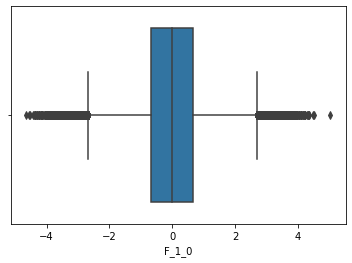

In [22]:
sns.boxplot(x=data_play['F_1_0'])

In [25]:
# data_play['F_1_0'].isnull().sum()

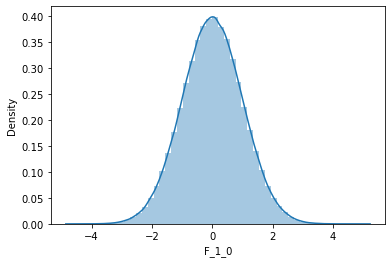

In [23]:
sns.distplot(data_play['F_1_0'])

In [12]:
data_play['F_1_0'].iloc[20::-1]

20   -0.859661
19    0.651089
18   -0.881626
17    1.749908
16    0.641497
15    0.386307
14    0.745005
13    0.322598
12   -1.086734
11    0.696625
10   -0.357771
9     0.144170
8    -0.334935
7    -1.737332
6     0.533210
5     0.088609
4     0.590212
3    -0.728420
2     0.256023
1     1.380940
0    -0.354591
Name: F_1_0, dtype: float64

## Outlier Detection

### Tukey Method

In [17]:
df_no_outlier_IQR=pd.DataFrame()
def remove_outlier(data_,col_name):
    global df_no_outlier_IQR
    
    Q1=data_[col].quantile(0.2465)
    Q3=data_[col].quantile(0.7465)    
    
    # Interquantile Range
    IQR= Q3-Q1
    print(f'Interquantile Range for feature:- {col} Is:---> {np.round(IQR,4)}')
    
    # Upper Whisker & Lower Whisker
    Lower_whisker=Q1-(1.5*IQR) # Or data[col_name].mean()-3*data[col_name].std()
    Upper_wishker=Q3+(1.5*IQR) # Or data[col_name].mean()+3*data[col_name].std()
    print ('Lower Whisker:---> {}'.format(np.round(Lower_whisker,4)),'\nUpper Whisker:---> {}'.format(np.round(Upper_wishker,4)))
    
    
    # dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)
    
    df_no_out= data_[((data_[col_name] > Lower_whisker) &   (data_[col_name] < Upper_wishker))]
#     print(df_no_out.shape,'shape of',col,'without outlier ')
    
    df_no_outlier_IQR=pd.concat([df_no_outlier_IQR,df_no_out[col]],axis=1)
    
    
#     print(df_no_outlier_IQR.shape,'shape of',col,'without outlier after concat ')
   
    print(data_.shape[0]-df_no_out.shape[0],'Data Points are Removed')
    return (df_no_outlier_IQR)

In [18]:
for i,col in enumerate(df_numeric[1:]):
    
    plt.figure(i)

    rem_out=remove_outlier(data_play,col)

Interquantile Range for feature:- F_1_0 Is:---> 1.3481
Lower Whisker:---> -2.7079 
Upper Whisker:---> 2.6846
25370 Data Points are Removed
Interquantile Range for feature:- F_1_1 Is:---> 1.3483
Lower Whisker:---> -2.7056 
Upper Whisker:---> 2.6877
25204 Data Points are Removed
Interquantile Range for feature:- F_1_2 Is:---> 1.3486
Lower Whisker:---> -2.7077 
Upper Whisker:---> 2.6865
24902 Data Points are Removed
Interquantile Range for feature:- F_1_3 Is:---> 1.3474
Lower Whisker:---> -2.7046 
Upper Whisker:---> 2.685
25165 Data Points are Removed
Interquantile Range for feature:- F_1_4 Is:---> 1.3492
Lower Whisker:---> -2.7072 
Upper Whisker:---> 2.6895
25210 Data Points are Removed
Interquantile Range for feature:- F_1_5 Is:---> 1.3499
Lower Whisker:---> -2.7098 
Upper Whisker:---> 2.69
24871 Data Points are Removed
Interquantile Range for feature:- F_1_6 Is:---> 1.3486
Lower Whisker:---> -2.7086 
Upper Whisker:---> 2.6858
25100 Data Points are Removed
Interquantile Range for featur

25190 Data Points are Removed
Interquantile Range for feature:- F_3_21 Is:---> 0.9101
Lower Whisker:---> -1.8537 
Upper Whisker:---> 1.7865
31984 Data Points are Removed
Interquantile Range for feature:- F_3_22 Is:---> 1.3484
Lower Whisker:---> -2.7082 
Upper Whisker:---> 2.6855
24977 Data Points are Removed
Interquantile Range for feature:- F_3_23 Is:---> 1.3481
Lower Whisker:---> -2.7071 
Upper Whisker:---> 2.6855
25110 Data Points are Removed
Interquantile Range for feature:- F_3_24 Is:---> 1.3499
Lower Whisker:---> -2.7112 
Upper Whisker:---> 2.6883
24995 Data Points are Removed
Interquantile Range for feature:- F_4_0 Is:---> 3.08
Lower Whisker:---> -5.8145 
Upper Whisker:---> 6.5055
27537 Data Points are Removed
Interquantile Range for feature:- F_4_1 Is:---> 3.2381
Lower Whisker:---> -6.8452 
Upper Whisker:---> 6.1071
25377 Data Points are Removed
Interquantile Range for feature:- F_4_2 Is:---> 1.0939
Lower Whisker:---> -2.2585 
Upper Whisker:---> 2.117
29737 Data Points are Remo

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

### Z-score

In [21]:
from scipy import stats

In [22]:
z = np.abs(stats.zscore(data_play))
print(z)

[[1.73204908        nan        nan ...        nan        nan        nan]
 [1.73204561        nan        nan ...        nan        nan        nan]
 [1.73204215        nan        nan ...        nan        nan        nan]
 ...
 [1.73204215        nan        nan ...        nan        nan        nan]
 [1.73204561        nan        nan ...        nan        nan        nan]
 [1.73204908        nan        nan ...        nan        nan        nan]]


In [23]:
threshold = 3
print(np.where(z > 3))

(array([     1,      2,      3, ..., 999986, 999987, 999995], dtype=int64), array([26, 35, 24, ..., 22, 35, 17], dtype=int64))


In [24]:
z[1][26]

3.055177051899331

In [19]:
def detecting_toal_outliers(data_,col):
    if col !='row_id':
        data_['z-score']=(data_[col]-data_[col].mean())/data_[col].std()     #stats.zscore(data_[col])
        threshold=3
        data_out= data_[(data_['z-score']<-3) | (data_['z-score']>3)] # No. Of outliers=Original Data shape - data with no outlier
        data_no_out=data_[(data_['z-score']>-3) & (data_['z-score']<3)]
        print (f'No. of Data Points present in outliers in the feature :- {col} are:-  {data_.shape[0] - data_no_out.shape[0]}')
#         return (data_out.shape

In [20]:
for feat in df_numeric:
    detecting_toal_outliers(data_cpy, feat)

No. of Data Points present in outliers in the feature :- F_1_0 are:-  20996
No. of Data Points present in outliers in the feature :- F_1_1 are:-  20941
No. of Data Points present in outliers in the feature :- F_1_2 are:-  20579
No. of Data Points present in outliers in the feature :- F_1_3 are:-  20916
No. of Data Points present in outliers in the feature :- F_1_4 are:-  21025
No. of Data Points present in outliers in the feature :- F_1_5 are:-  20679
No. of Data Points present in outliers in the feature :- F_1_6 are:-  20828
No. of Data Points present in outliers in the feature :- F_1_7 are:-  24797
No. of Data Points present in outliers in the feature :- F_1_8 are:-  20765
No. of Data Points present in outliers in the feature :- F_1_9 are:-  20879
No. of Data Points present in outliers in the feature :- F_1_10 are:-  20527
No. of Data Points present in outliers in the feature :- F_1_11 are:-  20844
No. of Data Points present in outliers in the feature :- F_1_12 are:-  24915
No. of Da

In [23]:
# data_cpy['F_4_14'].corr()
from sklearn.feature_selection import variance_threshold

### Selecting the Dependent Numerical Features
#### By Comparing Correlation And Std Probable Error

In [13]:
#Selecting the features 

numeric_Selc=[]
numeric_NotSelc=[]
def correaltion(column):
   
    r=data_cpy[column].corr(data_cpy['price'])
    print("correaltion :- ",r)
    std_error=(1-(r**2))/np.sqrt(2)
    print('Std Error:- ',std_error)
    prob_error=0.6745*std_error
    print("Std Probable Error :- ", prob_error)

    if r>(prob_error):
        numeric_Selc.append(column)
        
    print("Relation Exist =>",numeric_Selc)
    
#     else:
#         numeric_NotSelc.append(column)
#     print('Relation Does Not Exist =>',numeric_NotSelc)
        
    return r

In [75]:
# data_play.columns[:]
# data_play.iloc[:,3].name
# data_play[data_play.iloc[:,-1].name]
# data_play['F_4_14']

### Selecting the important features using correaltion & VIF 

In [110]:
selected_feat=[]

In [111]:
# for i in data_play.columns[1:]:
#     print(i,i+1)

for i in range (data_play.shape[1]):
    if data_play.iloc[:,i].name != 'row_id':
        for j in range (1,data_play.shape[1]):
            
            r=data_play[data_play.iloc[:,i].name].corr(data_play[data_play.iloc[:,j].name])
            print(f'correlation between {data_play.iloc[:,i].name} and {data_play.iloc[:,j].name} is :---> {np.round(r,4)}')
            
            vif=1/(1-r**2)
            print(f'Varition Influencing factor between {data_play.iloc[:,i].name} and {data_play.iloc[:,j].name} is :---> {vif}')
            
            if vif <10:
                selected_feat.extend([data_play.iloc[:,i].name,data_play.iloc[:,j].name])
print (f'Selcted features are :- {set(selected_feat)}')
                
                
            
#             print(f'Varition Influencing factor between {data_play.iloc[:,i].name} and {data_play.iloc[:,j].name} is :---> {vif}')
#             print(i,' :',data_play.iloc[:,i].name,'--->',data_play.iloc[:,j].name)

correlation between F_1_0 and F_1_0 is :---> 1.0
Varition Influencing factor between F_1_0 and F_1_0 is :---> inf
correlation between F_1_0 and F_1_1 is :---> -0.0002
Varition Influencing factor between F_1_0 and F_1_1 is :---> 1.0000000526288675
correlation between F_1_0 and F_1_2 is :---> -0.0006
Varition Influencing factor between F_1_0 and F_1_2 is :---> 1.0000003645553686
correlation between F_1_0 and F_1_3 is :---> -0.0007
Varition Influencing factor between F_1_0 and F_1_3 is :---> 1.0000004827476576
correlation between F_1_0 and F_1_4 is :---> 0.0007
Varition Influencing factor between F_1_0 and F_1_4 is :---> 1.000000439977293
correlation between F_1_0 and F_1_5 is :---> -0.0007
Varition Influencing factor between F_1_0 and F_1_5 is :---> 1.0000005315769473
correlation between F_1_0 and F_1_6 is :---> 0.0006
Varition Influencing factor between F_1_0 and F_1_6 is :---> 1.0000004197859338
correlation between F_1_0 and F_1_7 is :---> -0.0019
Varition Influencing factor between F_

correlation between F_1_0 and F_4_1 is :---> 0.0001
Varition Influencing factor between F_1_0 and F_4_1 is :---> 1.0000000098198818
correlation between F_1_0 and F_4_2 is :---> -0.0014
Varition Influencing factor between F_1_0 and F_4_2 is :---> 1.0000019458996008
correlation between F_1_0 and F_4_3 is :---> 0.0007
Varition Influencing factor between F_1_0 and F_4_3 is :---> 1.0000005353532353
correlation between F_1_0 and F_4_4 is :---> -0.0012
Varition Influencing factor between F_1_0 and F_4_4 is :---> 1.0000014658449612
correlation between F_1_0 and F_4_5 is :---> 0.0009
Varition Influencing factor between F_1_0 and F_4_5 is :---> 1.0000007246105058
correlation between F_1_0 and F_4_6 is :---> -0.0002
Varition Influencing factor between F_1_0 and F_4_6 is :---> 1.0000000572228023
correlation between F_1_0 and F_4_7 is :---> -0.0001
Varition Influencing factor between F_1_0 and F_4_7 is :---> 1.0000000098954167
correlation between F_1_0 and F_4_8 is :---> -0.0007
Varition Influencin

correlation between F_1_1 and F_3_11 is :---> 0.0011
Varition Influencing factor between F_1_1 and F_3_11 is :---> 1.0000011922711385
correlation between F_1_1 and F_3_12 is :---> 0.0011
Varition Influencing factor between F_1_1 and F_3_12 is :---> 1.0000011219487663
correlation between F_1_1 and F_3_13 is :---> 0.0017
Varition Influencing factor between F_1_1 and F_3_13 is :---> 1.000002963309854
correlation between F_1_1 and F_3_14 is :---> 0.0004
Varition Influencing factor between F_1_1 and F_3_14 is :---> 1.0000001426758993
correlation between F_1_1 and F_3_15 is :---> 0.0002
Varition Influencing factor between F_1_1 and F_3_15 is :---> 1.0000000399020055
correlation between F_1_1 and F_3_16 is :---> 0.0009
Varition Influencing factor between F_1_1 and F_3_16 is :---> 1.0000008543805596
correlation between F_1_1 and F_3_17 is :---> -0.0014
Varition Influencing factor between F_1_1 and F_3_17 is :---> 1.0000018561784736
correlation between F_1_1 and F_3_18 is :---> -0.0006
Varition

correlation between F_1_2 and F_2_22 is :---> 0.0005
Varition Influencing factor between F_1_2 and F_2_22 is :---> 1.00000023075146
correlation between F_1_2 and F_2_23 is :---> -0.0002
Varition Influencing factor between F_1_2 and F_2_23 is :---> 1.0000000602994321
correlation between F_1_2 and F_2_24 is :---> -0.0003
Varition Influencing factor between F_1_2 and F_2_24 is :---> 1.0000000869111736
correlation between F_1_2 and F_3_0 is :---> 0.0004
Varition Influencing factor between F_1_2 and F_3_0 is :---> 1.0000001552263864
correlation between F_1_2 and F_3_1 is :---> 0.0006
Varition Influencing factor between F_1_2 and F_3_1 is :---> 1.0000003653318412
correlation between F_1_2 and F_3_2 is :---> -0.0016
Varition Influencing factor between F_1_2 and F_3_2 is :---> 1.0000025981159166
correlation between F_1_2 and F_3_3 is :---> 0.0006
Varition Influencing factor between F_1_2 and F_3_3 is :---> 1.0000003830634199
correlation between F_1_2 and F_3_4 is :---> -0.0023
Varition Influen

correlation between F_1_3 and F_2_7 is :---> 0.0005
Varition Influencing factor between F_1_3 and F_2_7 is :---> 1.0000002670782677
correlation between F_1_3 and F_2_8 is :---> -0.0009
Varition Influencing factor between F_1_3 and F_2_8 is :---> 1.0000007873657202
correlation between F_1_3 and F_2_9 is :---> -0.0009
Varition Influencing factor between F_1_3 and F_2_9 is :---> 1.0000008179467255
correlation between F_1_3 and F_2_10 is :---> 0.0006
Varition Influencing factor between F_1_3 and F_2_10 is :---> 1.0000003967975113
correlation between F_1_3 and F_2_11 is :---> -0.0014
Varition Influencing factor between F_1_3 and F_2_11 is :---> 1.0000019830300728
correlation between F_1_3 and F_2_12 is :---> 0.0
Varition Influencing factor between F_1_3 and F_2_12 is :---> 1.000000000230729
correlation between F_1_3 and F_2_13 is :---> 0.0006
Varition Influencing factor between F_1_3 and F_2_13 is :---> 1.0000003756095357
correlation between F_1_3 and F_2_14 is :---> 0.0005
Varition Influen

Varition Influencing factor between F_1_4 and F_1_7 is :---> 1.0000015962625652
correlation between F_1_4 and F_1_8 is :---> -0.0014
Varition Influencing factor between F_1_4 and F_1_8 is :---> 1.0000020300661894
correlation between F_1_4 and F_1_9 is :---> -0.0008
Varition Influencing factor between F_1_4 and F_1_9 is :---> 1.0000007116863012
correlation between F_1_4 and F_1_10 is :---> 0.0004
Varition Influencing factor between F_1_4 and F_1_10 is :---> 1.0000001316834233
correlation between F_1_4 and F_1_11 is :---> -0.001
Varition Influencing factor between F_1_4 and F_1_11 is :---> 1.000000991565922
correlation between F_1_4 and F_1_12 is :---> -0.0008
Varition Influencing factor between F_1_4 and F_1_12 is :---> 1.0000006303168953
correlation between F_1_4 and F_1_13 is :---> 0.0006
Varition Influencing factor between F_1_4 and F_1_13 is :---> 1.0000003117917577
correlation between F_1_4 and F_1_14 is :---> 0.0006
Varition Influencing factor between F_1_4 and F_1_14 is :---> 1.0

correlation between F_1_4 and F_4_6 is :---> 0.0014
Varition Influencing factor between F_1_4 and F_4_6 is :---> 1.0000019877841435
correlation between F_1_4 and F_4_7 is :---> -0.0001
Varition Influencing factor between F_1_4 and F_4_7 is :---> 1.000000021491966
correlation between F_1_4 and F_4_8 is :---> 0.0005
Varition Influencing factor between F_1_4 and F_4_8 is :---> 1.000000269638311
correlation between F_1_4 and F_4_9 is :---> 0.0004
Varition Influencing factor between F_1_4 and F_4_9 is :---> 1.000000148824653
correlation between F_1_4 and F_4_10 is :---> -0.0005
Varition Influencing factor between F_1_4 and F_4_10 is :---> 1.0000002969713917
correlation between F_1_4 and F_4_11 is :---> -0.0015
Varition Influencing factor between F_1_4 and F_4_11 is :---> 1.0000023416895538
correlation between F_1_4 and F_4_12 is :---> 0.0005
Varition Influencing factor between F_1_4 and F_4_12 is :---> 1.0000002212674965
correlation between F_1_4 and F_4_13 is :---> 0.0028
Varition Influenc

correlation between F_1_5 and F_3_17 is :---> 0.0002
Varition Influencing factor between F_1_5 and F_3_17 is :---> 1.000000054780697
correlation between F_1_5 and F_3_18 is :---> 0.0011
Varition Influencing factor between F_1_5 and F_3_18 is :---> 1.0000013062245738
correlation between F_1_5 and F_3_19 is :---> -0.0024
Varition Influencing factor between F_1_5 and F_3_19 is :---> 1.0000058309622877
correlation between F_1_5 and F_3_20 is :---> -0.0001
Varition Influencing factor between F_1_5 and F_3_20 is :---> 1.000000011437036
correlation between F_1_5 and F_3_21 is :---> 0.0005
Varition Influencing factor between F_1_5 and F_3_21 is :---> 1.0000002521132365
correlation between F_1_5 and F_3_22 is :---> -0.0004
Varition Influencing factor between F_1_5 and F_3_22 is :---> 1.000000174998992
correlation between F_1_5 and F_3_23 is :---> -0.0005
Varition Influencing factor between F_1_5 and F_3_23 is :---> 1.0000002535056343
correlation between F_1_5 and F_3_24 is :---> -0.001
Varition

correlation between F_1_6 and F_2_24 is :---> 0.0
Varition Influencing factor between F_1_6 and F_2_24 is :---> 1.0000000009987393
correlation between F_1_6 and F_3_0 is :---> 0.0007
Varition Influencing factor between F_1_6 and F_3_0 is :---> 1.0000004282814505
correlation between F_1_6 and F_3_1 is :---> 0.0001
Varition Influencing factor between F_1_6 and F_3_1 is :---> 1.0000000163419798
correlation between F_1_6 and F_3_2 is :---> -0.0002
Varition Influencing factor between F_1_6 and F_3_2 is :---> 1.0000000352379659
correlation between F_1_6 and F_3_3 is :---> 0.0011
Varition Influencing factor between F_1_6 and F_3_3 is :---> 1.0000011593585463
correlation between F_1_6 and F_3_4 is :---> 0.0001
Varition Influencing factor between F_1_6 and F_3_4 is :---> 1.0000000046137434
correlation between F_1_6 and F_3_5 is :---> -0.0007
Varition Influencing factor between F_1_6 and F_3_5 is :---> 1.0000004577340436
correlation between F_1_6 and F_3_6 is :---> -0.0002
Varition Influencing f

correlation between F_1_7 and F_2_8 is :---> 0.0005
Varition Influencing factor between F_1_7 and F_2_8 is :---> 1.00000028627342
correlation between F_1_7 and F_2_9 is :---> -0.0007
Varition Influencing factor between F_1_7 and F_2_9 is :---> 1.0000004239700966
correlation between F_1_7 and F_2_10 is :---> -0.0003
Varition Influencing factor between F_1_7 and F_2_10 is :---> 1.0000000984607103
correlation between F_1_7 and F_2_11 is :---> 0.0031
Varition Influencing factor between F_1_7 and F_2_11 is :---> 1.0000096295030798
correlation between F_1_7 and F_2_12 is :---> -0.0006
Varition Influencing factor between F_1_7 and F_2_12 is :---> 1.000000418245252
correlation between F_1_7 and F_2_13 is :---> 0.0001
Varition Influencing factor between F_1_7 and F_2_13 is :---> 1.0000000100469453
correlation between F_1_7 and F_2_14 is :---> -0.0002
Varition Influencing factor between F_1_7 and F_2_14 is :---> 1.0000000589233595
correlation between F_1_7 and F_2_15 is :---> -0.0015
Varition In

correlation between F_1_8 and F_1_8 is :---> 1.0
Varition Influencing factor between F_1_8 and F_1_8 is :---> 2251799813685248.0
correlation between F_1_8 and F_1_9 is :---> -0.0002
Varition Influencing factor between F_1_8 and F_1_9 is :---> 1.0000000492217778
correlation between F_1_8 and F_1_10 is :---> -0.0012
Varition Influencing factor between F_1_8 and F_1_10 is :---> 1.000001525038796
correlation between F_1_8 and F_1_11 is :---> 0.0006
Varition Influencing factor between F_1_8 and F_1_11 is :---> 1.0000003146656924
correlation between F_1_8 and F_1_12 is :---> 0.0005
Varition Influencing factor between F_1_8 and F_1_12 is :---> 1.0000002911594752
correlation between F_1_8 and F_1_13 is :---> 0.0
Varition Influencing factor between F_1_8 and F_1_13 is :---> 1.0000000009955534
correlation between F_1_8 and F_1_14 is :---> -0.0004
Varition Influencing factor between F_1_8 and F_1_14 is :---> 1.0000001840987451
correlation between F_1_8 and F_2_0 is :---> 0.0005
Varition Influenci

correlation between F_1_8 and F_4_7 is :---> 0.0009
Varition Influencing factor between F_1_8 and F_4_7 is :---> 1.0000008288572395
correlation between F_1_8 and F_4_8 is :---> -0.0022
Varition Influencing factor between F_1_8 and F_4_8 is :---> 1.0000048631719822
correlation between F_1_8 and F_4_9 is :---> -0.0
Varition Influencing factor between F_1_8 and F_4_9 is :---> 1.0000000015272603
correlation between F_1_8 and F_4_10 is :---> -0.0012
Varition Influencing factor between F_1_8 and F_4_10 is :---> 1.0000013294390748
correlation between F_1_8 and F_4_11 is :---> 0.0017
Varition Influencing factor between F_1_8 and F_4_11 is :---> 1.0000028524841906
correlation between F_1_8 and F_4_12 is :---> 0.0006
Varition Influencing factor between F_1_8 and F_4_12 is :---> 1.0000003150390255
correlation between F_1_8 and F_4_13 is :---> 0.0004
Varition Influencing factor between F_1_8 and F_4_13 is :---> 1.0000001584613247
correlation between F_1_8 and F_4_14 is :---> 0.0023
Varition Influe

correlation between F_1_9 and F_3_16 is :---> -0.0005
Varition Influencing factor between F_1_9 and F_3_16 is :---> 1.0000003010495306
correlation between F_1_9 and F_3_17 is :---> 0.0016
Varition Influencing factor between F_1_9 and F_3_17 is :---> 1.0000024527351137
correlation between F_1_9 and F_3_18 is :---> -0.0001
Varition Influencing factor between F_1_9 and F_3_18 is :---> 1.0000000139940752
correlation between F_1_9 and F_3_19 is :---> 0.0
Varition Influencing factor between F_1_9 and F_3_19 is :---> 1.000000000060694
correlation between F_1_9 and F_3_20 is :---> 0.0005
Varition Influencing factor between F_1_9 and F_3_20 is :---> 1.0000002405635593
correlation between F_1_9 and F_3_21 is :---> 0.0005
Varition Influencing factor between F_1_9 and F_3_21 is :---> 1.0000002171700368
correlation between F_1_9 and F_3_22 is :---> 0.0012
Varition Influencing factor between F_1_9 and F_3_22 is :---> 1.00000143618067
correlation between F_1_9 and F_3_23 is :---> 0.001
Varition Influ

correlation between F_1_10 and F_3_1 is :---> -0.0016
Varition Influencing factor between F_1_10 and F_3_1 is :---> 1.0000024515474257
correlation between F_1_10 and F_3_2 is :---> -0.0
Varition Influencing factor between F_1_10 and F_3_2 is :---> 1.0000000024445557
correlation between F_1_10 and F_3_3 is :---> -0.0011
Varition Influencing factor between F_1_10 and F_3_3 is :---> 1.0000011790836731
correlation between F_1_10 and F_3_4 is :---> 0.0003
Varition Influencing factor between F_1_10 and F_3_4 is :---> 1.0000000634348107
correlation between F_1_10 and F_3_5 is :---> -0.0017
Varition Influencing factor between F_1_10 and F_3_5 is :---> 1.0000027783052285
correlation between F_1_10 and F_3_6 is :---> -0.0011
Varition Influencing factor between F_1_10 and F_3_6 is :---> 1.000001130806491
correlation between F_1_10 and F_3_7 is :---> 0.0005
Varition Influencing factor between F_1_10 and F_3_7 is :---> 1.0000002985337433
correlation between F_1_10 and F_3_8 is :---> -0.0005
Varitio

correlation between F_1_11 and F_2_11 is :---> 0.0007
Varition Influencing factor between F_1_11 and F_2_11 is :---> 1.000000433004006
correlation between F_1_11 and F_2_12 is :---> 0.0017
Varition Influencing factor between F_1_11 and F_2_12 is :---> 1.0000028701994534
correlation between F_1_11 and F_2_13 is :---> -0.0014
Varition Influencing factor between F_1_11 and F_2_13 is :---> 1.0000020045460973
correlation between F_1_11 and F_2_14 is :---> -0.0002
Varition Influencing factor between F_1_11 and F_2_14 is :---> 1.0000000611449813
correlation between F_1_11 and F_2_15 is :---> -0.001
Varition Influencing factor between F_1_11 and F_2_15 is :---> 1.00000104794974
correlation between F_1_11 and F_2_16 is :---> 0.0022
Varition Influencing factor between F_1_11 and F_2_16 is :---> 1.00000475629528
correlation between F_1_11 and F_2_17 is :---> 0.0008
Varition Influencing factor between F_1_11 and F_2_17 is :---> 1.0000006867445608
correlation between F_1_11 and F_2_18 is :---> -0.0

correlation between F_1_12 and F_1_14 is :---> -0.0005
Varition Influencing factor between F_1_12 and F_1_14 is :---> 1.0000002469554707
correlation between F_1_12 and F_2_0 is :---> -0.0009
Varition Influencing factor between F_1_12 and F_2_0 is :---> 1.0000007750718936
correlation between F_1_12 and F_2_1 is :---> -0.0004
Varition Influencing factor between F_1_12 and F_2_1 is :---> 1.00000017152633
correlation between F_1_12 and F_2_2 is :---> 0.0003
Varition Influencing factor between F_1_12 and F_2_2 is :---> 1.0000000731022658
correlation between F_1_12 and F_2_3 is :---> 0.0
Varition Influencing factor between F_1_12 and F_2_3 is :---> 1.000000000001871
correlation between F_1_12 and F_2_4 is :---> -0.0026
Varition Influencing factor between F_1_12 and F_2_4 is :---> 1.0000067882396346
correlation between F_1_12 and F_2_5 is :---> 0.0001
Varition Influencing factor between F_1_12 and F_2_5 is :---> 1.0000000109627036
correlation between F_1_12 and F_2_6 is :---> -0.0008
Varition

correlation between F_1_12 and F_4_12 is :---> -0.0002
Varition Influencing factor between F_1_12 and F_4_12 is :---> 1.0000000519621373
correlation between F_1_12 and F_4_13 is :---> 0.0
Varition Influencing factor between F_1_12 and F_4_13 is :---> 1.000000000835975
correlation between F_1_12 and F_4_14 is :---> 0.0001
Varition Influencing factor between F_1_12 and F_4_14 is :---> 1.0000000063263192
correlation between F_1_13 and F_1_0 is :---> -0.0001
Varition Influencing factor between F_1_13 and F_1_0 is :---> 1.0000000185577076
correlation between F_1_13 and F_1_1 is :---> -0.0009
Varition Influencing factor between F_1_13 and F_1_1 is :---> 1.000000881614695
correlation between F_1_13 and F_1_2 is :---> 0.0005
Varition Influencing factor between F_1_13 and F_1_2 is :---> 1.0000002347125079
correlation between F_1_13 and F_1_3 is :---> 0.0013
Varition Influencing factor between F_1_13 and F_1_3 is :---> 1.0000017429302364
correlation between F_1_13 and F_1_4 is :---> 0.0006
Varit

correlation between F_1_13 and F_3_24 is :---> -0.0017
Varition Influencing factor between F_1_13 and F_3_24 is :---> 1.0000029289541585
correlation between F_1_13 and F_4_0 is :---> 0.0005
Varition Influencing factor between F_1_13 and F_4_0 is :---> 1.0000002123686742
correlation between F_1_13 and F_4_1 is :---> 0.0005
Varition Influencing factor between F_1_13 and F_4_1 is :---> 1.0000002381771669
correlation between F_1_13 and F_4_2 is :---> 0.0009
Varition Influencing factor between F_1_13 and F_4_2 is :---> 1.0000007925090901
correlation between F_1_13 and F_4_3 is :---> -0.001
Varition Influencing factor between F_1_13 and F_4_3 is :---> 1.0000010951013139
correlation between F_1_13 and F_4_4 is :---> -0.0005
Varition Influencing factor between F_1_13 and F_4_4 is :---> 1.0000002424880052
correlation between F_1_13 and F_4_5 is :---> 0.0018
Varition Influencing factor between F_1_13 and F_4_5 is :---> 1.0000032731073567
correlation between F_1_13 and F_4_6 is :---> 0.0017
Varit

correlation between F_1_14 and F_3_10 is :---> 0.0003
Varition Influencing factor between F_1_14 and F_3_10 is :---> 1.0000001086480457
correlation between F_1_14 and F_3_11 is :---> 0.0004
Varition Influencing factor between F_1_14 and F_3_11 is :---> 1.0000001230730522
correlation between F_1_14 and F_3_12 is :---> 0.001
Varition Influencing factor between F_1_14 and F_3_12 is :---> 1.0000009771894174
correlation between F_1_14 and F_3_13 is :---> 0.0001
Varition Influencing factor between F_1_14 and F_3_13 is :---> 1.0000000091301144
correlation between F_1_14 and F_3_14 is :---> 0.001
Varition Influencing factor between F_1_14 and F_3_14 is :---> 1.0000010338519714
correlation between F_1_14 and F_3_15 is :---> -0.0017
Varition Influencing factor between F_1_14 and F_3_15 is :---> 1.0000028322566046
correlation between F_1_14 and F_3_16 is :---> 0.002
Varition Influencing factor between F_1_14 and F_3_16 is :---> 1.0000039978309174
correlation between F_1_14 and F_3_17 is :---> 0.0

correlation between F_2_0 and F_2_18 is :---> -0.0012
Varition Influencing factor between F_2_0 and F_2_18 is :---> 1.0000014089462252
correlation between F_2_0 and F_2_19 is :---> -0.0018
Varition Influencing factor between F_2_0 and F_2_19 is :---> 1.0000032799876455
correlation between F_2_0 and F_2_20 is :---> -0.0417
Varition Influencing factor between F_2_0 and F_2_20 is :---> 1.0017408989458731
correlation between F_2_0 and F_2_21 is :---> -0.0733
Varition Influencing factor between F_2_0 and F_2_21 is :---> 1.005400932815312
correlation between F_2_0 and F_2_22 is :---> 0.0362
Varition Influencing factor between F_2_0 and F_2_22 is :---> 1.0013113773004956
correlation between F_2_0 and F_2_23 is :---> 0.1306
Varition Influencing factor between F_2_0 and F_2_23 is :---> 1.01736343894847
correlation between F_2_0 and F_2_24 is :---> 0.0633
Varition Influencing factor between F_2_0 and F_2_24 is :---> 1.0040215194571962
correlation between F_2_0 and F_3_0 is :---> -0.0007
Varition

correlation between F_2_1 and F_2_5 is :---> 0.0471
Varition Influencing factor between F_2_1 and F_2_5 is :---> 1.0022189005571345
correlation between F_2_1 and F_2_6 is :---> 0.0287
Varition Influencing factor between F_2_1 and F_2_6 is :---> 1.0008249554474653
correlation between F_2_1 and F_2_7 is :---> -0.0372
Varition Influencing factor between F_2_1 and F_2_7 is :---> 1.0013840965889562
correlation between F_2_1 and F_2_8 is :---> 0.0391
Varition Influencing factor between F_2_1 and F_2_8 is :---> 1.0015318953510708
correlation between F_2_1 and F_2_9 is :---> -0.0481
Varition Influencing factor between F_2_1 and F_2_9 is :---> 1.0023196265413727
correlation between F_2_1 and F_2_10 is :---> 0.0389
Varition Influencing factor between F_2_1 and F_2_10 is :---> 1.0015191914624435
correlation between F_2_1 and F_2_11 is :---> -0.0134
Varition Influencing factor between F_2_1 and F_2_11 is :---> 1.0001808145011624
correlation between F_2_1 and F_2_12 is :---> -0.0759
Varition Influe

correlation between F_2_2 and F_1_9 is :---> -0.001
Varition Influencing factor between F_2_2 and F_1_9 is :---> 1.0000009894562365
correlation between F_2_2 and F_1_10 is :---> 0.0006
Varition Influencing factor between F_2_2 and F_1_10 is :---> 1.0000003970109779
correlation between F_2_2 and F_1_11 is :---> 0.0001
Varition Influencing factor between F_2_2 and F_1_11 is :---> 1.0000000036981649
correlation between F_2_2 and F_1_12 is :---> 0.0003
Varition Influencing factor between F_2_2 and F_1_12 is :---> 1.0000000731022658
correlation between F_2_2 and F_1_13 is :---> -0.0002
Varition Influencing factor between F_2_2 and F_1_13 is :---> 1.000000059331627
correlation between F_2_2 and F_1_14 is :---> -0.0003
Varition Influencing factor between F_2_2 and F_1_14 is :---> 1.0000000711236499
correlation between F_2_2 and F_2_0 is :---> -0.0938
Varition Influencing factor between F_2_2 and F_2_0 is :---> 1.008884004634207
correlation between F_2_2 and F_2_1 is :---> 0.0681
Varition Infl

correlation between F_2_2 and F_4_6 is :---> -0.0005
Varition Influencing factor between F_2_2 and F_4_6 is :---> 1.0000002136456743
correlation between F_2_2 and F_4_7 is :---> 0.0012
Varition Influencing factor between F_2_2 and F_4_7 is :---> 1.0000015244443006
correlation between F_2_2 and F_4_8 is :---> 0.0007
Varition Influencing factor between F_2_2 and F_4_8 is :---> 1.0000005610764362
correlation between F_2_2 and F_4_9 is :---> -0.0008
Varition Influencing factor between F_2_2 and F_4_9 is :---> 1.0000006525395264
correlation between F_2_2 and F_4_10 is :---> -0.0007
Varition Influencing factor between F_2_2 and F_4_10 is :---> 1.0000004940122034
correlation between F_2_2 and F_4_11 is :---> 0.0008
Varition Influencing factor between F_2_2 and F_4_11 is :---> 1.0000005639398575
correlation between F_2_2 and F_4_12 is :---> 0.0007
Varition Influencing factor between F_2_2 and F_4_12 is :---> 1.000000442198035
correlation between F_2_2 and F_4_13 is :---> 0.0002
Varition Influe

correlation between F_2_3 and F_3_14 is :---> 0.0006
Varition Influencing factor between F_2_3 and F_3_14 is :---> 1.0000003061205187
correlation between F_2_3 and F_3_15 is :---> 0.0018
Varition Influencing factor between F_2_3 and F_3_15 is :---> 1.0000032960190655
correlation between F_2_3 and F_3_16 is :---> -0.0004
Varition Influencing factor between F_2_3 and F_3_16 is :---> 1.000000175835035
correlation between F_2_3 and F_3_17 is :---> 0.0004
Varition Influencing factor between F_2_3 and F_3_17 is :---> 1.0000001593927745
correlation between F_2_3 and F_3_18 is :---> -0.0007
Varition Influencing factor between F_2_3 and F_3_18 is :---> 1.0000004480332525
correlation between F_2_3 and F_3_19 is :---> 0.0007
Varition Influencing factor between F_2_3 and F_3_19 is :---> 1.0000004241618379
correlation between F_2_3 and F_3_20 is :---> -0.001
Varition Influencing factor between F_2_3 and F_3_20 is :---> 1.0000010204289196
correlation between F_2_3 and F_3_21 is :---> 0.0019
Varition

correlation between F_2_4 and F_3_1 is :---> -0.001
Varition Influencing factor between F_2_4 and F_3_1 is :---> 1.000001076575569
correlation between F_2_4 and F_3_2 is :---> -0.0003
Varition Influencing factor between F_2_4 and F_3_2 is :---> 1.0000001197519848
correlation between F_2_4 and F_3_3 is :---> -0.001
Varition Influencing factor between F_2_4 and F_3_3 is :---> 1.0000010260573369
correlation between F_2_4 and F_3_4 is :---> -0.0015
Varition Influencing factor between F_2_4 and F_3_4 is :---> 1.0000023321446427
correlation between F_2_4 and F_3_5 is :---> -0.0019
Varition Influencing factor between F_2_4 and F_3_5 is :---> 1.0000037739263852
correlation between F_2_4 and F_3_6 is :---> -0.0009
Varition Influencing factor between F_2_4 and F_3_6 is :---> 1.0000007939731284
correlation between F_2_4 and F_3_7 is :---> 0.0
Varition Influencing factor between F_2_4 and F_3_7 is :---> 1.0000000007771213
correlation between F_2_4 and F_3_8 is :---> 0.001
Varition Influencing fact

correlation between F_2_5 and F_2_8 is :---> 0.2103
Varition Influencing factor between F_2_5 and F_2_8 is :---> 1.046271346605017
correlation between F_2_5 and F_2_9 is :---> -0.0365
Varition Influencing factor between F_2_5 and F_2_9 is :---> 1.001335755389802
correlation between F_2_5 and F_2_10 is :---> -0.0694
Varition Influencing factor between F_2_5 and F_2_10 is :---> 1.0048392544981544
correlation between F_2_5 and F_2_11 is :---> 0.0586
Varition Influencing factor between F_2_5 and F_2_11 is :---> 1.003443874441635
correlation between F_2_5 and F_2_12 is :---> -0.0048
Varition Influencing factor between F_2_5 and F_2_12 is :---> 1.0000228434511418
correlation between F_2_5 and F_2_13 is :---> -0.0806
Varition Influencing factor between F_2_5 and F_2_13 is :---> 1.0065459266274983
correlation between F_2_5 and F_2_14 is :---> 0.1596
Varition Influencing factor between F_2_5 and F_2_14 is :---> 1.0261301316303617
correlation between F_2_5 and F_2_15 is :---> 0.0918
Varition Inf

correlation between F_2_6 and F_1_6 is :---> 0.0004
Varition Influencing factor between F_2_6 and F_1_6 is :---> 1.0000001349716
correlation between F_2_6 and F_1_7 is :---> -0.0012
Varition Influencing factor between F_2_6 and F_1_7 is :---> 1.000001499787293
correlation between F_2_6 and F_1_8 is :---> -0.0001
Varition Influencing factor between F_2_6 and F_1_8 is :---> 1.000000020056043
correlation between F_2_6 and F_1_9 is :---> 0.0001
Varition Influencing factor between F_2_6 and F_1_9 is :---> 1.0000000155296092
correlation between F_2_6 and F_1_10 is :---> 0.0009
Varition Influencing factor between F_2_6 and F_1_10 is :---> 1.0000008838843695
correlation between F_2_6 and F_1_11 is :---> -0.0014
Varition Influencing factor between F_2_6 and F_1_11 is :---> 1.0000020395643092
correlation between F_2_6 and F_1_12 is :---> -0.0008
Varition Influencing factor between F_2_6 and F_1_12 is :---> 1.0000006296001869
correlation between F_2_6 and F_1_13 is :---> -0.0002
Varition Influenc

correlation between F_2_6 and F_4_7 is :---> -0.0007
Varition Influencing factor between F_2_6 and F_4_7 is :---> 1.000000537175569
correlation between F_2_6 and F_4_8 is :---> 0.0012
Varition Influencing factor between F_2_6 and F_4_8 is :---> 1.0000014640545334
correlation between F_2_6 and F_4_9 is :---> -0.0017
Varition Influencing factor between F_2_6 and F_4_9 is :---> 1.0000028579128586
correlation between F_2_6 and F_4_10 is :---> -0.001
Varition Influencing factor between F_2_6 and F_4_10 is :---> 1.0000009117038229
correlation between F_2_6 and F_4_11 is :---> -0.0015
Varition Influencing factor between F_2_6 and F_4_11 is :---> 1.000002113813683
correlation between F_2_6 and F_4_12 is :---> 0.0022
Varition Influencing factor between F_2_6 and F_4_12 is :---> 1.0000048366729108
correlation between F_2_6 and F_4_13 is :---> -0.0001
Varition Influencing factor between F_2_6 and F_4_13 is :---> 1.0000000129937114
correlation between F_2_6 and F_4_14 is :---> -0.0007
Varition Inf

correlation between F_2_7 and F_3_15 is :---> 0.0025
Varition Influencing factor between F_2_7 and F_3_15 is :---> 1.0000064236471962
correlation between F_2_7 and F_3_16 is :---> -0.0018
Varition Influencing factor between F_2_7 and F_3_16 is :---> 1.0000031400813405
correlation between F_2_7 and F_3_17 is :---> -0.0003
Varition Influencing factor between F_2_7 and F_3_17 is :---> 1.0000000903717068
correlation between F_2_7 and F_3_18 is :---> 0.0007
Varition Influencing factor between F_2_7 and F_3_18 is :---> 1.0000004337664108
correlation between F_2_7 and F_3_19 is :---> 0.0001
Varition Influencing factor between F_2_7 and F_3_19 is :---> 1.000000003793924
correlation between F_2_7 and F_3_20 is :---> 0.0017
Varition Influencing factor between F_2_7 and F_3_20 is :---> 1.000002897919793
correlation between F_2_7 and F_3_21 is :---> 0.0007
Varition Influencing factor between F_2_7 and F_3_21 is :---> 1.000000516966327
correlation between F_2_7 and F_3_22 is :---> -0.0009
Varition 

correlation between F_2_8 and F_3_3 is :---> 0.0014
Varition Influencing factor between F_2_8 and F_3_3 is :---> 1.0000018248040037
correlation between F_2_8 and F_3_4 is :---> -0.0006
Varition Influencing factor between F_2_8 and F_3_4 is :---> 1.0000003522846175
correlation between F_2_8 and F_3_5 is :---> 0.0006
Varition Influencing factor between F_2_8 and F_3_5 is :---> 1.0000003065477223
correlation between F_2_8 and F_3_6 is :---> 0.0001
Varition Influencing factor between F_2_8 and F_3_6 is :---> 1.000000005859467
correlation between F_2_8 and F_3_7 is :---> 0.0
Varition Influencing factor between F_2_8 and F_3_7 is :---> 1.000000001753384
correlation between F_2_8 and F_3_8 is :---> -0.001
Varition Influencing factor between F_2_8 and F_3_8 is :---> 1.00000091866695
correlation between F_2_8 and F_3_9 is :---> 0.0001
Varition Influencing factor between F_2_8 and F_3_9 is :---> 1.0000000057021396
correlation between F_2_8 and F_3_10 is :---> -0.0021
Varition Influencing factor 

correlation between F_2_9 and F_2_15 is :---> -0.0849
Varition Influencing factor between F_2_9 and F_2_15 is :---> 1.0072557168532608
correlation between F_2_9 and F_2_16 is :---> -0.0102
Varition Influencing factor between F_2_9 and F_2_16 is :---> 1.0001047701043468
correlation between F_2_9 and F_2_17 is :---> 0.0144
Varition Influencing factor between F_2_9 and F_2_17 is :---> 1.0002074169080872
correlation between F_2_9 and F_2_18 is :---> 0.1052
Varition Influencing factor between F_2_9 and F_2_18 is :---> 1.0111973303011697
correlation between F_2_9 and F_2_19 is :---> 0.1009
Varition Influencing factor between F_2_9 and F_2_19 is :---> 1.010288162807548
correlation between F_2_9 and F_2_20 is :---> 0.0456
Varition Influencing factor between F_2_9 and F_2_20 is :---> 1.0020826818869781
correlation between F_2_9 and F_2_21 is :---> -0.0175
Varition Influencing factor between F_2_9 and F_2_21 is :---> 1.0003053988236157
correlation between F_2_9 and F_2_22 is :---> 0.1372
Varitio

correlation between F_2_10 and F_1_14 is :---> -0.0006
Varition Influencing factor between F_2_10 and F_1_14 is :---> 1.000000362952893
correlation between F_2_10 and F_2_0 is :---> 0.073
Varition Influencing factor between F_2_10 and F_2_0 is :---> 1.0053553937743456
correlation between F_2_10 and F_2_1 is :---> 0.0389
Varition Influencing factor between F_2_10 and F_2_1 is :---> 1.0015191914624435
correlation between F_2_10 and F_2_2 is :---> -0.0137
Varition Influencing factor between F_2_10 and F_2_2 is :---> 1.0001875863016512
correlation between F_2_10 and F_2_3 is :---> 0.0093
Varition Influencing factor between F_2_10 and F_2_3 is :---> 1.0000874266030055
correlation between F_2_10 and F_2_4 is :---> 0.0993
Varition Influencing factor between F_2_10 and F_2_4 is :---> 1.0099526785351447
correlation between F_2_10 and F_2_5 is :---> -0.0694
Varition Influencing factor between F_2_10 and F_2_5 is :---> 1.0048392544981544
correlation between F_2_10 and F_2_6 is :---> 0.0172
Variti

correlation between F_2_10 and F_4_11 is :---> -0.0009
Varition Influencing factor between F_2_10 and F_4_11 is :---> 1.000000861582628
correlation between F_2_10 and F_4_12 is :---> 0.0027
Varition Influencing factor between F_2_10 and F_4_12 is :---> 1.0000072838661025
correlation between F_2_10 and F_4_13 is :---> 0.0007
Varition Influencing factor between F_2_10 and F_4_13 is :---> 1.0000005344094756
correlation between F_2_10 and F_4_14 is :---> -0.0009
Varition Influencing factor between F_2_10 and F_4_14 is :---> 1.000000858561302
correlation between F_2_11 and F_1_0 is :---> 0.0007
Varition Influencing factor between F_2_11 and F_1_0 is :---> 1.0000004600829364
correlation between F_2_11 and F_1_1 is :---> 0.001
Varition Influencing factor between F_2_11 and F_1_1 is :---> 1.0000010642925448
correlation between F_2_11 and F_1_2 is :---> 0.0014
Varition Influencing factor between F_2_11 and F_1_2 is :---> 1.0000019586202014
correlation between F_2_11 and F_1_3 is :---> -0.0014
V

correlation between F_2_11 and F_3_22 is :---> -0.0002
Varition Influencing factor between F_2_11 and F_3_22 is :---> 1.0000000525455723
correlation between F_2_11 and F_3_23 is :---> -0.0004
Varition Influencing factor between F_2_11 and F_3_23 is :---> 1.000000123077883
correlation between F_2_11 and F_3_24 is :---> -0.0018
Varition Influencing factor between F_2_11 and F_3_24 is :---> 1.0000034079797318
correlation between F_2_11 and F_4_0 is :---> -0.0
Varition Influencing factor between F_2_11 and F_4_0 is :---> 1.0000000010212076
correlation between F_2_11 and F_4_1 is :---> -0.0003
Varition Influencing factor between F_2_11 and F_4_1 is :---> 1.0000001056364687
correlation between F_2_11 and F_4_2 is :---> 0.0009
Varition Influencing factor between F_2_11 and F_4_2 is :---> 1.0000009022850953
correlation between F_2_11 and F_4_3 is :---> -0.0002
Varition Influencing factor between F_2_11 and F_4_3 is :---> 1.0000000233110218
correlation between F_2_11 and F_4_4 is :---> -0.0006


correlation between F_2_12 and F_3_3 is :---> -0.0011
Varition Influencing factor between F_2_12 and F_3_3 is :---> 1.000001265175985
correlation between F_2_12 and F_3_4 is :---> 0.0018
Varition Influencing factor between F_2_12 and F_3_4 is :---> 1.0000031593293364
correlation between F_2_12 and F_3_5 is :---> -0.001
Varition Influencing factor between F_2_12 and F_3_5 is :---> 1.0000009678107171
correlation between F_2_12 and F_3_6 is :---> -0.001
Varition Influencing factor between F_2_12 and F_3_6 is :---> 1.0000009836949102
correlation between F_2_12 and F_3_7 is :---> 0.0012
Varition Influencing factor between F_2_12 and F_3_7 is :---> 1.0000013275819164
correlation between F_2_12 and F_3_8 is :---> -0.0022
Varition Influencing factor between F_2_12 and F_3_8 is :---> 1.0000046590447678
correlation between F_2_12 and F_3_9 is :---> 0.0006
Varition Influencing factor between F_2_12 and F_3_9 is :---> 1.0000003564153104
correlation between F_2_12 and F_3_10 is :---> 0.0002
Varitio

correlation between F_2_13 and F_2_10 is :---> 0.0682
Varition Influencing factor between F_2_13 and F_2_10 is :---> 1.004676588206868
correlation between F_2_13 and F_2_11 is :---> -0.0341
Varition Influencing factor between F_2_13 and F_2_11 is :---> 1.0011645021593902
correlation between F_2_13 and F_2_12 is :---> -0.0406
Varition Influencing factor between F_2_13 and F_2_12 is :---> 1.0016470612971633
correlation between F_2_13 and F_2_13 is :---> 1.0
Varition Influencing factor between F_2_13 and F_2_13 is :---> inf
correlation between F_2_13 and F_2_14 is :---> -0.0543
Varition Influencing factor between F_2_13 and F_2_14 is :---> 1.0029536213787258
correlation between F_2_13 and F_2_15 is :---> 0.0216
Varition Influencing factor between F_2_13 and F_2_15 is :---> 1.0004651470757473
correlation between F_2_13 and F_2_16 is :---> -0.0734
Varition Influencing factor between F_2_13 and F_2_16 is :---> 1.0054145389223195
correlation between F_2_13 and F_2_17 is :---> -0.0128
Varition

correlation between F_2_14 and F_1_6 is :---> 0.0006
Varition Influencing factor between F_2_14 and F_1_6 is :---> 1.0000004016077013
correlation between F_2_14 and F_1_7 is :---> -0.0002
Varition Influencing factor between F_2_14 and F_1_7 is :---> 1.0000000589233595
correlation between F_2_14 and F_1_8 is :---> -0.0006
Varition Influencing factor between F_2_14 and F_1_8 is :---> 1.0000004174212063
correlation between F_2_14 and F_1_9 is :---> -0.0001
Varition Influencing factor between F_2_14 and F_1_9 is :---> 1.0000000145138312
correlation between F_2_14 and F_1_10 is :---> 0.0004
Varition Influencing factor between F_2_14 and F_1_10 is :---> 1.0000001505459464
correlation between F_2_14 and F_1_11 is :---> -0.0002
Varition Influencing factor between F_2_14 and F_1_11 is :---> 1.0000000611449813
correlation between F_2_14 and F_1_12 is :---> 0.0022
Varition Influencing factor between F_2_14 and F_1_12 is :---> 1.000005027697528
correlation between F_2_14 and F_1_13 is :---> 0.0003

correlation between F_2_14 and F_4_8 is :---> 0.0009
Varition Influencing factor between F_2_14 and F_4_8 is :---> 1.0000008648669152
correlation between F_2_14 and F_4_9 is :---> -0.0007
Varition Influencing factor between F_2_14 and F_4_9 is :---> 1.000000464962714
correlation between F_2_14 and F_4_10 is :---> 0.0005
Varition Influencing factor between F_2_14 and F_4_10 is :---> 1.0000002237527668
correlation between F_2_14 and F_4_11 is :---> 0.0011
Varition Influencing factor between F_2_14 and F_4_11 is :---> 1.0000011197366632
correlation between F_2_14 and F_4_12 is :---> -0.0014
Varition Influencing factor between F_2_14 and F_4_12 is :---> 1.000001844883673
correlation between F_2_14 and F_4_13 is :---> -0.0009
Varition Influencing factor between F_2_14 and F_4_13 is :---> 1.00000089532096
correlation between F_2_14 and F_4_14 is :---> -0.0005
Varition Influencing factor between F_2_14 and F_4_14 is :---> 1.000000300583382
correlation between F_2_15 and F_1_0 is :---> -0.0002

correlation between F_2_15 and F_3_15 is :---> 0.0011
Varition Influencing factor between F_2_15 and F_3_15 is :---> 1.0000011341293107
correlation between F_2_15 and F_3_16 is :---> 0.0008
Varition Influencing factor between F_2_15 and F_3_16 is :---> 1.0000005897747497
correlation between F_2_15 and F_3_17 is :---> 0.0004
Varition Influencing factor between F_2_15 and F_3_17 is :---> 1.0000001665028777
correlation between F_2_15 and F_3_18 is :---> 0.0003
Varition Influencing factor between F_2_15 and F_3_18 is :---> 1.0000000742199657
correlation between F_2_15 and F_3_19 is :---> -0.0009
Varition Influencing factor between F_2_15 and F_3_19 is :---> 1.0000007728260136
correlation between F_2_15 and F_3_20 is :---> -0.0003
Varition Influencing factor between F_2_15 and F_3_20 is :---> 1.000000099270584
correlation between F_2_15 and F_3_21 is :---> 0.0011
Varition Influencing factor between F_2_15 and F_3_21 is :---> 1.0000011613223083
correlation between F_2_15 and F_3_22 is :---> 

correlation between F_2_16 and F_2_24 is :---> -0.0475
Varition Influencing factor between F_2_16 and F_2_24 is :---> 1.0022579361136323
correlation between F_2_16 and F_3_0 is :---> 0.0015
Varition Influencing factor between F_2_16 and F_3_0 is :---> 1.0000023387203438
correlation between F_2_16 and F_3_1 is :---> -0.001
Varition Influencing factor between F_2_16 and F_3_1 is :---> 1.0000009750209895
correlation between F_2_16 and F_3_2 is :---> -0.0012
Varition Influencing factor between F_2_16 and F_3_2 is :---> 1.0000014118704053
correlation between F_2_16 and F_3_3 is :---> 0.0031
Varition Influencing factor between F_2_16 and F_3_3 is :---> 1.000009311003051
correlation between F_2_16 and F_3_4 is :---> -0.0009
Varition Influencing factor between F_2_16 and F_3_4 is :---> 1.0000007351839888
correlation between F_2_16 and F_3_5 is :---> -0.0003
Varition Influencing factor between F_2_16 and F_3_5 is :---> 1.0000000941452458
correlation between F_2_16 and F_3_6 is :---> -0.0007
Var

correlation between F_2_17 and F_2_12 is :---> 0.0393
Varition Influencing factor between F_2_17 and F_2_12 is :---> 1.0015462025082391
correlation between F_2_17 and F_2_13 is :---> -0.0128
Varition Influencing factor between F_2_17 and F_2_13 is :---> 1.0001642504842072
correlation between F_2_17 and F_2_14 is :---> -0.1959
Varition Influencing factor between F_2_17 and F_2_14 is :---> 1.0398885803479962
correlation between F_2_17 and F_2_15 is :---> -0.0966
Varition Influencing factor between F_2_17 and F_2_15 is :---> 1.009418336481207
correlation between F_2_17 and F_2_16 is :---> -0.1191
Varition Influencing factor between F_2_17 and F_2_16 is :---> 1.0143897893255074
correlation between F_2_17 and F_2_17 is :---> 1.0
Varition Influencing factor between F_2_17 and F_2_17 is :---> inf
correlation between F_2_17 and F_2_18 is :---> 0.0139
Varition Influencing factor between F_2_17 and F_2_18 is :---> 1.000194611226256
correlation between F_2_17 and F_2_19 is :---> -0.0171
Varition 

correlation between F_2_18 and F_1_11 is :---> -0.0008
Varition Influencing factor between F_2_18 and F_1_11 is :---> 1.0000006506928223
correlation between F_2_18 and F_1_12 is :---> -0.0004
Varition Influencing factor between F_2_18 and F_1_12 is :---> 1.000000170943799
correlation between F_2_18 and F_1_13 is :---> 0.0021
Varition Influencing factor between F_2_18 and F_1_13 is :---> 1.0000042708951462
correlation between F_2_18 and F_1_14 is :---> 0.0002
Varition Influencing factor between F_2_18 and F_1_14 is :---> 1.0000000517495842
correlation between F_2_18 and F_2_0 is :---> -0.0012
Varition Influencing factor between F_2_18 and F_2_0 is :---> 1.0000014089462252
correlation between F_2_18 and F_2_1 is :---> 0.0549
Varition Influencing factor between F_2_18 and F_2_1 is :---> 1.0030271038564833
correlation between F_2_18 and F_2_2 is :---> -0.0651
Varition Influencing factor between F_2_18 and F_2_2 is :---> 1.0042545582987283
correlation between F_2_18 and F_2_3 is :---> -0.08

correlation between F_2_18 and F_4_11 is :---> 0.002
Varition Influencing factor between F_2_18 and F_4_11 is :---> 1.0000041080674393
correlation between F_2_18 and F_4_12 is :---> -0.0008
Varition Influencing factor between F_2_18 and F_4_12 is :---> 1.0000006602244098
correlation between F_2_18 and F_4_13 is :---> 0.0009
Varition Influencing factor between F_2_18 and F_4_13 is :---> 1.000000749200289
correlation between F_2_18 and F_4_14 is :---> 0.0009
Varition Influencing factor between F_2_18 and F_4_14 is :---> 1.000000878136067
correlation between F_2_19 and F_1_0 is :---> -0.0012
Varition Influencing factor between F_2_19 and F_1_0 is :---> 1.0000014672864606
correlation between F_2_19 and F_1_1 is :---> -0.0005
Varition Influencing factor between F_2_19 and F_1_1 is :---> 1.0000002487079698
correlation between F_2_19 and F_1_2 is :---> -0.0012
Varition Influencing factor between F_2_19 and F_1_2 is :---> 1.0000013279020976
correlation between F_2_19 and F_1_3 is :---> -0.001


correlation between F_2_19 and F_3_19 is :---> 0.002
Varition Influencing factor between F_2_19 and F_3_19 is :---> 1.0000039485671126
correlation between F_2_19 and F_3_20 is :---> -0.0001
Varition Influencing factor between F_2_19 and F_3_20 is :---> 1.0000000213229387
correlation between F_2_19 and F_3_21 is :---> -0.0002
Varition Influencing factor between F_2_19 and F_3_21 is :---> 1.0000000281969221
correlation between F_2_19 and F_3_22 is :---> -0.0
Varition Influencing factor between F_2_19 and F_3_22 is :---> 1.0000000024982758
correlation between F_2_19 and F_3_23 is :---> 0.0004
Varition Influencing factor between F_2_19 and F_3_23 is :---> 1.0000001678003818
correlation between F_2_19 and F_3_24 is :---> -0.0011
Varition Influencing factor between F_2_19 and F_3_24 is :---> 1.00000123474771
correlation between F_2_19 and F_4_0 is :---> -0.0014
Varition Influencing factor between F_2_19 and F_4_0 is :---> 1.0000019481539117
correlation between F_2_19 and F_4_1 is :---> -0.00

correlation between F_2_20 and F_3_0 is :---> -0.0013
Varition Influencing factor between F_2_20 and F_3_0 is :---> 1.0000017139269894
correlation between F_2_20 and F_3_1 is :---> -0.0008
Varition Influencing factor between F_2_20 and F_3_1 is :---> 1.000000697509162
correlation between F_2_20 and F_3_2 is :---> -0.0004
Varition Influencing factor between F_2_20 and F_3_2 is :---> 1.0000001252220518
correlation between F_2_20 and F_3_3 is :---> 0.0007
Varition Influencing factor between F_2_20 and F_3_3 is :---> 1.0000004247031922
correlation between F_2_20 and F_3_4 is :---> 0.0011
Varition Influencing factor between F_2_20 and F_3_4 is :---> 1.0000012324123038
correlation between F_2_20 and F_3_5 is :---> -0.0006
Varition Influencing factor between F_2_20 and F_3_5 is :---> 1.0000003159319528
correlation between F_2_20 and F_3_6 is :---> 0.0008
Varition Influencing factor between F_2_20 and F_3_6 is :---> 1.0000006978246005
correlation between F_2_20 and F_3_7 is :---> -0.0004
Varit

correlation between F_2_21 and F_2_8 is :---> 0.0842
Varition Influencing factor between F_2_21 and F_2_8 is :---> 1.0071481066348298
correlation between F_2_21 and F_2_9 is :---> -0.0175
Varition Influencing factor between F_2_21 and F_2_9 is :---> 1.0003053988236157
correlation between F_2_21 and F_2_10 is :---> -0.06
Varition Influencing factor between F_2_21 and F_2_10 is :---> 1.0036098261103048
correlation between F_2_21 and F_2_11 is :---> 0.046
Varition Influencing factor between F_2_21 and F_2_11 is :---> 1.0021246290657606
correlation between F_2_21 and F_2_12 is :---> 0.0662
Varition Influencing factor between F_2_21 and F_2_12 is :---> 1.0044022356106248
correlation between F_2_21 and F_2_13 is :---> -0.0724
Varition Influencing factor between F_2_21 and F_2_13 is :---> 1.0052739326864861
correlation between F_2_21 and F_2_14 is :---> 0.0772
Varition Influencing factor between F_2_21 and F_2_14 is :---> 1.0060011726652622
correlation between F_2_21 and F_2_15 is :---> -0.01

correlation between F_2_22 and F_1_10 is :---> 0.0023
Varition Influencing factor between F_2_22 and F_1_10 is :---> 1.0000050869890686
correlation between F_2_22 and F_1_11 is :---> 0.0004
Varition Influencing factor between F_2_22 and F_1_11 is :---> 1.0000001249515575
correlation between F_2_22 and F_1_12 is :---> 0.0004
Varition Influencing factor between F_2_22 and F_1_12 is :---> 1.0000001670328682
correlation between F_2_22 and F_1_13 is :---> -0.0012
Varition Influencing factor between F_2_22 and F_1_13 is :---> 1.0000013813691055
correlation between F_2_22 and F_1_14 is :---> -0.0009
Varition Influencing factor between F_2_22 and F_1_14 is :---> 1.0000007390620456
correlation between F_2_22 and F_2_0 is :---> 0.0362
Varition Influencing factor between F_2_22 and F_2_0 is :---> 1.0013113773004956
correlation between F_2_22 and F_2_1 is :---> -0.0481
Varition Influencing factor between F_2_22 and F_2_1 is :---> 1.0023232871695629
correlation between F_2_22 and F_2_2 is :---> -0.

correlation between F_2_22 and F_4_9 is :---> 0.0005
Varition Influencing factor between F_2_22 and F_4_9 is :---> 1.0000002411327031
correlation between F_2_22 and F_4_10 is :---> -0.0006
Varition Influencing factor between F_2_22 and F_4_10 is :---> 1.0000003205450585
correlation between F_2_22 and F_4_11 is :---> -0.0002
Varition Influencing factor between F_2_22 and F_4_11 is :---> 1.0000000395746207
correlation between F_2_22 and F_4_12 is :---> -0.0001
Varition Influencing factor between F_2_22 and F_4_12 is :---> 1.000000010260297
correlation between F_2_22 and F_4_13 is :---> -0.0001
Varition Influencing factor between F_2_22 and F_4_13 is :---> 1.0000000133576796
correlation between F_2_22 and F_4_14 is :---> -0.0013
Varition Influencing factor between F_2_22 and F_4_14 is :---> 1.0000016425197389
correlation between F_2_23 and F_1_0 is :---> 0.0008
Varition Influencing factor between F_2_23 and F_1_0 is :---> 1.0000007080173068
correlation between F_2_23 and F_1_1 is :---> 0.

correlation between F_2_23 and F_3_17 is :---> 0.0008
Varition Influencing factor between F_2_23 and F_3_17 is :---> 1.0000006084121928
correlation between F_2_23 and F_3_18 is :---> -0.0011
Varition Influencing factor between F_2_23 and F_3_18 is :---> 1.000001197416783
correlation between F_2_23 and F_3_19 is :---> -0.002
Varition Influencing factor between F_2_23 and F_3_19 is :---> 1.0000039184018368
correlation between F_2_23 and F_3_20 is :---> 0.0004
Varition Influencing factor between F_2_23 and F_3_20 is :---> 1.0000001769194966
correlation between F_2_23 and F_3_21 is :---> 0.0002
Varition Influencing factor between F_2_23 and F_3_21 is :---> 1.0000000617419855
correlation between F_2_23 and F_3_22 is :---> -0.0016
Varition Influencing factor between F_2_23 and F_3_22 is :---> 1.000002495003325
correlation between F_2_23 and F_3_23 is :---> 0.0007
Varition Influencing factor between F_2_23 and F_3_23 is :---> 1.000000508495596
correlation between F_2_23 and F_3_24 is :---> 0.

correlation between F_2_24 and F_3_1 is :---> 0.0001
Varition Influencing factor between F_2_24 and F_3_1 is :---> 1.0000000055188418
correlation between F_2_24 and F_3_2 is :---> 0.0013
Varition Influencing factor between F_2_24 and F_3_2 is :---> 1.0000017188507326
correlation between F_2_24 and F_3_3 is :---> 0.0007
Varition Influencing factor between F_2_24 and F_3_3 is :---> 1.0000005602021218
correlation between F_2_24 and F_3_4 is :---> 0.001
Varition Influencing factor between F_2_24 and F_3_4 is :---> 1.000000902501757
correlation between F_2_24 and F_3_5 is :---> -0.0
Varition Influencing factor between F_2_24 and F_3_5 is :---> 1.0000000014003163
correlation between F_2_24 and F_3_6 is :---> 0.0005
Varition Influencing factor between F_2_24 and F_3_6 is :---> 1.0000002492019904
correlation between F_2_24 and F_3_7 is :---> 0.0002
Varition Influencing factor between F_2_24 and F_3_7 is :---> 1.00000002306161
correlation between F_2_24 and F_3_8 is :---> -0.0004
Varition Influ

correlation between F_3_0 and F_2_12 is :---> 0.0012
Varition Influencing factor between F_3_0 and F_2_12 is :---> 1.0000013358377768
correlation between F_3_0 and F_2_13 is :---> -0.0011
Varition Influencing factor between F_3_0 and F_2_13 is :---> 1.0000012637804852
correlation between F_3_0 and F_2_14 is :---> 0.0025
Varition Influencing factor between F_3_0 and F_2_14 is :---> 1.0000062254811342
correlation between F_3_0 and F_2_15 is :---> 0.0
Varition Influencing factor between F_3_0 and F_2_15 is :---> 1.0000000003205127
correlation between F_3_0 and F_2_16 is :---> 0.0015
Varition Influencing factor between F_3_0 and F_2_16 is :---> 1.0000023387203438
correlation between F_3_0 and F_2_17 is :---> -0.0014
Varition Influencing factor between F_3_0 and F_2_17 is :---> 1.0000019132416675
correlation between F_3_0 and F_2_18 is :---> -0.0001
Varition Influencing factor between F_3_0 and F_2_18 is :---> 1.000000014480335
correlation between F_3_0 and F_2_19 is :---> -0.0017
Varition 

correlation between F_3_1 and F_1_14 is :---> -0.0001
Varition Influencing factor between F_3_1 and F_1_14 is :---> 1.0000000034527636
correlation between F_3_1 and F_2_0 is :---> 0.0002
Varition Influencing factor between F_3_1 and F_2_0 is :---> 1.0000000327019363
correlation between F_3_1 and F_2_1 is :---> -0.0013
Varition Influencing factor between F_3_1 and F_2_1 is :---> 1.0000016159741052
correlation between F_3_1 and F_2_2 is :---> 0.0017
Varition Influencing factor between F_3_1 and F_2_2 is :---> 1.0000028701476167
correlation between F_3_1 and F_2_3 is :---> -0.0014
Varition Influencing factor between F_3_1 and F_2_3 is :---> 1.000001879033337
correlation between F_3_1 and F_2_4 is :---> -0.001
Varition Influencing factor between F_3_1 and F_2_4 is :---> 1.000001076575569
correlation between F_3_1 and F_2_5 is :---> 0.0002
Varition Influencing factor between F_3_1 and F_2_5 is :---> 1.0000000375007063
correlation between F_3_1 and F_2_6 is :---> 0.0001
Varition Influencing 

correlation between F_3_1 and F_4_11 is :---> -0.0017
Varition Influencing factor between F_3_1 and F_4_11 is :---> 1.0000029500898557
correlation between F_3_1 and F_4_12 is :---> 0.0011
Varition Influencing factor between F_3_1 and F_4_12 is :---> 1.000001168834261
correlation between F_3_1 and F_4_13 is :---> -0.0007
Varition Influencing factor between F_3_1 and F_4_13 is :---> 1.000000454535021
correlation between F_3_1 and F_4_14 is :---> -0.0001
Varition Influencing factor between F_3_1 and F_4_14 is :---> 1.0000000215213922
correlation between F_3_2 and F_1_0 is :---> 0.0004
Varition Influencing factor between F_3_2 and F_1_0 is :---> 1.0000001941920005
correlation between F_3_2 and F_1_1 is :---> 0.0003
Varition Influencing factor between F_3_2 and F_1_1 is :---> 1.0000001005571357
correlation between F_3_2 and F_1_2 is :---> -0.0016
Varition Influencing factor between F_3_2 and F_1_2 is :---> 1.0000025981159166
correlation between F_3_2 and F_1_3 is :---> 0.0004
Varition Influ

correlation between F_3_2 and F_3_24 is :---> -0.001
Varition Influencing factor between F_3_2 and F_3_24 is :---> 1.0000009467838948
correlation between F_3_2 and F_4_0 is :---> -0.0001
Varition Influencing factor between F_3_2 and F_4_0 is :---> 1.0000000157115012
correlation between F_3_2 and F_4_1 is :---> 0.0006
Varition Influencing factor between F_3_2 and F_4_1 is :---> 1.0000003405632223
correlation between F_3_2 and F_4_2 is :---> -0.0014
Varition Influencing factor between F_3_2 and F_4_2 is :---> 1.0000018704817375
correlation between F_3_2 and F_4_3 is :---> -0.001
Varition Influencing factor between F_3_2 and F_4_3 is :---> 1.0000009812490656
correlation between F_3_2 and F_4_4 is :---> -0.0024
Varition Influencing factor between F_3_2 and F_4_4 is :---> 1.0000057556847373
correlation between F_3_2 and F_4_5 is :---> -0.0001
Varition Influencing factor between F_3_2 and F_4_5 is :---> 1.0000000052367453
correlation between F_3_2 and F_4_6 is :---> -0.0004
Varition Influenc

correlation between F_3_3 and F_3_7 is :---> 0.0013
Varition Influencing factor between F_3_3 and F_3_7 is :---> 1.0000017559768826
correlation between F_3_3 and F_3_8 is :---> 0.0021
Varition Influencing factor between F_3_3 and F_3_8 is :---> 1.0000045045537604
correlation between F_3_3 and F_3_9 is :---> 0.0003
Varition Influencing factor between F_3_3 and F_3_9 is :---> 1.0000001124159787
correlation between F_3_3 and F_3_10 is :---> 0.0009
Varition Influencing factor between F_3_3 and F_3_10 is :---> 1.0000007346373776
correlation between F_3_3 and F_3_11 is :---> -0.0013
Varition Influencing factor between F_3_3 and F_3_11 is :---> 1.0000016921317794
correlation between F_3_3 and F_3_12 is :---> -0.0003
Varition Influencing factor between F_3_3 and F_3_12 is :---> 1.0000000820339112
correlation between F_3_3 and F_3_13 is :---> -0.001
Varition Influencing factor between F_3_3 and F_3_13 is :---> 1.0000010262786392
correlation between F_3_3 and F_3_14 is :---> -0.001
Varition Infl

correlation between F_3_4 and F_2_16 is :---> -0.0009
Varition Influencing factor between F_3_4 and F_2_16 is :---> 1.0000007351839888
correlation between F_3_4 and F_2_17 is :---> -0.0002
Varition Influencing factor between F_3_4 and F_2_17 is :---> 1.000000026284396
correlation between F_3_4 and F_2_18 is :---> -0.0007
Varition Influencing factor between F_3_4 and F_2_18 is :---> 1.0000004363671702
correlation between F_3_4 and F_2_19 is :---> -0.002
Varition Influencing factor between F_3_4 and F_2_19 is :---> 1.0000039977441018
correlation between F_3_4 and F_2_20 is :---> 0.0011
Varition Influencing factor between F_3_4 and F_2_20 is :---> 1.0000012324123038
correlation between F_3_4 and F_2_21 is :---> -0.0013
Varition Influencing factor between F_3_4 and F_2_21 is :---> 1.0000016683365016
correlation between F_3_4 and F_2_22 is :---> -0.0
Varition Influencing factor between F_3_4 and F_2_22 is :---> 1.000000002057942
correlation between F_3_4 and F_2_23 is :---> -0.0008
Varition

correlation between F_3_5 and F_1_14 is :---> -0.001
Varition Influencing factor between F_3_5 and F_1_14 is :---> 1.0000009349829886
correlation between F_3_5 and F_2_0 is :---> -0.0002
Varition Influencing factor between F_3_5 and F_2_0 is :---> 1.0000000306373786
correlation between F_3_5 and F_2_1 is :---> 0.0013
Varition Influencing factor between F_3_5 and F_2_1 is :---> 1.0000015921222578
correlation between F_3_5 and F_2_2 is :---> -0.0004
Varition Influencing factor between F_3_5 and F_2_2 is :---> 1.0000001667092795
correlation between F_3_5 and F_2_3 is :---> -0.0004
Varition Influencing factor between F_3_5 and F_2_3 is :---> 1.0000001737763116
correlation between F_3_5 and F_2_4 is :---> -0.0019
Varition Influencing factor between F_3_5 and F_2_4 is :---> 1.0000037739263852
correlation between F_3_5 and F_2_5 is :---> 0.0016
Varition Influencing factor between F_3_5 and F_2_5 is :---> 1.0000025490835862
correlation between F_3_5 and F_2_6 is :---> 0.001
Varition Influencin

correlation between F_3_5 and F_4_11 is :---> -0.0012
Varition Influencing factor between F_3_5 and F_4_11 is :---> 1.000001326758487
correlation between F_3_5 and F_4_12 is :---> 0.0011
Varition Influencing factor between F_3_5 and F_4_12 is :---> 1.000001234140185
correlation between F_3_5 and F_4_13 is :---> 0.0013
Varition Influencing factor between F_3_5 and F_4_13 is :---> 1.000001645543809
correlation between F_3_5 and F_4_14 is :---> -0.001
Varition Influencing factor between F_3_5 and F_4_14 is :---> 1.0000010370595882
correlation between F_3_6 and F_1_0 is :---> 0.0004
Varition Influencing factor between F_3_6 and F_1_0 is :---> 1.0000001908666596
correlation between F_3_6 and F_1_1 is :---> -0.0006
Varition Influencing factor between F_3_6 and F_1_1 is :---> 1.0000004075736488
correlation between F_3_6 and F_1_2 is :---> 0.0007
Varition Influencing factor between F_3_6 and F_1_2 is :---> 1.0000004803170637
correlation between F_3_6 and F_1_3 is :---> 0.0008
Varition Influenc

correlation between F_3_6 and F_3_21 is :---> -0.0013
Varition Influencing factor between F_3_6 and F_3_21 is :---> 1.0000016486634082
correlation between F_3_6 and F_3_22 is :---> -0.001
Varition Influencing factor between F_3_6 and F_3_22 is :---> 1.0000009725502348
correlation between F_3_6 and F_3_23 is :---> 0.0007
Varition Influencing factor between F_3_6 and F_3_23 is :---> 1.0000004235805864
correlation between F_3_6 and F_3_24 is :---> -0.0022
Varition Influencing factor between F_3_6 and F_3_24 is :---> 1.0000047450698937
correlation between F_3_6 and F_4_0 is :---> 0.0017
Varition Influencing factor between F_3_6 and F_4_0 is :---> 1.0000029223945592
correlation between F_3_6 and F_4_1 is :---> 0.0002
Varition Influencing factor between F_3_6 and F_4_1 is :---> 1.0000000226928956
correlation between F_3_6 and F_4_2 is :---> -0.0014
Varition Influencing factor between F_3_6 and F_4_2 is :---> 1.0000019579112933
correlation between F_3_6 and F_4_3 is :---> -0.0007
Varition Inf

correlation between F_3_7 and F_3_6 is :---> -0.0008
Varition Influencing factor between F_3_7 and F_3_6 is :---> 1.0000006823348553
correlation between F_3_7 and F_3_7 is :---> 1.0
Varition Influencing factor between F_3_7 and F_3_7 is :---> inf
correlation between F_3_7 and F_3_8 is :---> -0.0015
Varition Influencing factor between F_3_7 and F_3_8 is :---> 1.0000021555910488
correlation between F_3_7 and F_3_9 is :---> 0.0009
Varition Influencing factor between F_3_7 and F_3_9 is :---> 1.000000798918736
correlation between F_3_7 and F_3_10 is :---> -0.0011
Varition Influencing factor between F_3_7 and F_3_10 is :---> 1.0000011656946335
correlation between F_3_7 and F_3_11 is :---> -0.0006
Varition Influencing factor between F_3_7 and F_3_11 is :---> 1.0000003997031295
correlation between F_3_7 and F_3_12 is :---> 0.0014
Varition Influencing factor between F_3_7 and F_3_12 is :---> 1.0000019856206714
correlation between F_3_7 and F_3_13 is :---> -0.0019
Varition Influencing factor bet

correlation between F_3_8 and F_2_15 is :---> -0.0007
Varition Influencing factor between F_3_8 and F_2_15 is :---> 1.0000004600921781
correlation between F_3_8 and F_2_16 is :---> -0.0011
Varition Influencing factor between F_3_8 and F_2_16 is :---> 1.0000011091360688
correlation between F_3_8 and F_2_17 is :---> -0.0001
Varition Influencing factor between F_3_8 and F_2_17 is :---> 1.00000001536218
correlation between F_3_8 and F_2_18 is :---> -0.0002
Varition Influencing factor between F_3_8 and F_2_18 is :---> 1.000000060023527
correlation between F_3_8 and F_2_19 is :---> -0.0012
Varition Influencing factor between F_3_8 and F_2_19 is :---> 1.000001516560324
correlation between F_3_8 and F_2_20 is :---> -0.0005
Varition Influencing factor between F_3_8 and F_2_20 is :---> 1.0000002231972913
correlation between F_3_8 and F_2_21 is :---> -0.0015
Varition Influencing factor between F_3_8 and F_2_21 is :---> 1.0000022477268913
correlation between F_3_8 and F_2_22 is :---> 0.0007
Variti

correlation between F_3_9 and F_1_13 is :---> 0.0008
Varition Influencing factor between F_3_9 and F_1_13 is :---> 1.0000007072237922
correlation between F_3_9 and F_1_14 is :---> -0.0017
Varition Influencing factor between F_3_9 and F_1_14 is :---> 1.000002885609579
correlation between F_3_9 and F_2_0 is :---> -0.0002
Varition Influencing factor between F_3_9 and F_2_0 is :---> 1.0000000594055134
correlation between F_3_9 and F_2_1 is :---> 0.0007
Varition Influencing factor between F_3_9 and F_2_1 is :---> 1.0000005329901671
correlation between F_3_9 and F_2_2 is :---> -0.0004
Varition Influencing factor between F_3_9 and F_2_2 is :---> 1.000000178245921
correlation between F_3_9 and F_2_3 is :---> -0.0004
Varition Influencing factor between F_3_9 and F_2_3 is :---> 1.0000001367401212
correlation between F_3_9 and F_2_4 is :---> 0.0004
Varition Influencing factor between F_3_9 and F_2_4 is :---> 1.0000001385199084
correlation between F_3_9 and F_2_5 is :---> 0.0011
Varition Influenci

correlation between F_3_9 and F_4_10 is :---> -0.0002
Varition Influencing factor between F_3_9 and F_4_10 is :---> 1.0000000358051615
correlation between F_3_9 and F_4_11 is :---> 0.0012
Varition Influencing factor between F_3_9 and F_4_11 is :---> 1.0000015111060867
correlation between F_3_9 and F_4_12 is :---> -0.0009
Varition Influencing factor between F_3_9 and F_4_12 is :---> 1.0000008679770236
correlation between F_3_9 and F_4_13 is :---> -0.0006
Varition Influencing factor between F_3_9 and F_4_13 is :---> 1.0000003506652766
correlation between F_3_9 and F_4_14 is :---> -0.001
Varition Influencing factor between F_3_9 and F_4_14 is :---> 1.000001063220162
correlation between F_3_10 and F_1_0 is :---> 0.001
Varition Influencing factor between F_3_10 and F_1_0 is :---> 1.000000960201784
correlation between F_3_10 and F_1_1 is :---> -0.0003
Varition Influencing factor between F_3_10 and F_1_1 is :---> 1.0000000799326567
correlation between F_3_10 and F_1_2 is :---> -0.0022
Varitio

correlation between F_3_10 and F_3_23 is :---> 0.0015
Varition Influencing factor between F_3_10 and F_3_23 is :---> 1.0000023150951702
correlation between F_3_10 and F_3_24 is :---> 0.0011
Varition Influencing factor between F_3_10 and F_3_24 is :---> 1.0000011705805312
correlation between F_3_10 and F_4_0 is :---> -0.0007
Varition Influencing factor between F_3_10 and F_4_0 is :---> 1.0000004236739537
correlation between F_3_10 and F_4_1 is :---> -0.0008
Varition Influencing factor between F_3_10 and F_4_1 is :---> 1.0000006810238575
correlation between F_3_10 and F_4_2 is :---> -0.0015
Varition Influencing factor between F_3_10 and F_4_2 is :---> 1.000002379813946
correlation between F_3_10 and F_4_3 is :---> -0.0004
Varition Influencing factor between F_3_10 and F_4_3 is :---> 1.0000001297463477
correlation between F_3_10 and F_4_4 is :---> 0.0019
Varition Influencing factor between F_3_10 and F_4_4 is :---> 1.0000035617498275
correlation between F_3_10 and F_4_5 is :---> 0.0003
Va

correlation between F_3_11 and F_3_4 is :---> -0.0014
Varition Influencing factor between F_3_11 and F_3_4 is :---> 1.000001944546357
correlation between F_3_11 and F_3_5 is :---> -0.0003
Varition Influencing factor between F_3_11 and F_3_5 is :---> 1.000000070879478
correlation between F_3_11 and F_3_6 is :---> 0.0014
Varition Influencing factor between F_3_11 and F_3_6 is :---> 1.0000019418412294
correlation between F_3_11 and F_3_7 is :---> -0.0006
Varition Influencing factor between F_3_11 and F_3_7 is :---> 1.0000003997031295
correlation between F_3_11 and F_3_8 is :---> -0.0
Varition Influencing factor between F_3_11 and F_3_8 is :---> 1.0000000001852125
correlation between F_3_11 and F_3_9 is :---> 0.0007
Varition Influencing factor between F_3_11 and F_3_9 is :---> 1.0000004374111244
correlation between F_3_11 and F_3_10 is :---> -0.0015
Varition Influencing factor between F_3_11 and F_3_10 is :---> 1.0000021404752586
correlation between F_3_11 and F_3_11 is :---> 1.0
Varition 

correlation between F_3_12 and F_2_14 is :---> 0.0004
Varition Influencing factor between F_3_12 and F_2_14 is :---> 1.0000001410063717
correlation between F_3_12 and F_2_15 is :---> 0.0012
Varition Influencing factor between F_3_12 and F_2_15 is :---> 1.0000013879725558
correlation between F_3_12 and F_2_16 is :---> 0.0002
Varition Influencing factor between F_3_12 and F_2_16 is :---> 1.0000000225761172
correlation between F_3_12 and F_2_17 is :---> 0.001
Varition Influencing factor between F_3_12 and F_2_17 is :---> 1.0000009668026415
correlation between F_3_12 and F_2_18 is :---> -0.0014
Varition Influencing factor between F_3_12 and F_2_18 is :---> 1.0000020073811933
correlation between F_3_12 and F_2_19 is :---> 0.0005
Varition Influencing factor between F_3_12 and F_2_19 is :---> 1.000000227498285
correlation between F_3_12 and F_2_20 is :---> -0.0014
Varition Influencing factor between F_3_12 and F_2_20 is :---> 1.0000018552194643
correlation between F_3_12 and F_2_21 is :---> 0

correlation between F_3_13 and F_1_12 is :---> 0.0009
Varition Influencing factor between F_3_13 and F_1_12 is :---> 1.000000751100253
correlation between F_3_13 and F_1_13 is :---> -0.0008
Varition Influencing factor between F_3_13 and F_1_13 is :---> 1.0000006559555354
correlation between F_3_13 and F_1_14 is :---> 0.0001
Varition Influencing factor between F_3_13 and F_1_14 is :---> 1.0000000091301144
correlation between F_3_13 and F_2_0 is :---> 0.001
Varition Influencing factor between F_3_13 and F_2_0 is :---> 1.0000009226146789
correlation between F_3_13 and F_2_1 is :---> -0.0004
Varition Influencing factor between F_3_13 and F_2_1 is :---> 1.0000001795442859
correlation between F_3_13 and F_2_2 is :---> -0.0008
Varition Influencing factor between F_3_13 and F_2_2 is :---> 1.0000006213160988
correlation between F_3_13 and F_2_3 is :---> 0.001
Varition Influencing factor between F_3_13 and F_2_3 is :---> 1.000000928066277
correlation between F_3_13 and F_2_4 is :---> -0.0002
Var

correlation between F_3_13 and F_4_10 is :---> 0.0004
Varition Influencing factor between F_3_13 and F_4_10 is :---> 1.0000001920727979
correlation between F_3_13 and F_4_11 is :---> -0.0
Varition Influencing factor between F_3_13 and F_4_11 is :---> 1.000000002270395
correlation between F_3_13 and F_4_12 is :---> -0.0012
Varition Influencing factor between F_3_13 and F_4_12 is :---> 1.0000014682159337
correlation between F_3_13 and F_4_13 is :---> -0.0001
Varition Influencing factor between F_3_13 and F_4_13 is :---> 1.0000000052262608
correlation between F_3_13 and F_4_14 is :---> -0.0016
Varition Influencing factor between F_3_13 and F_4_14 is :---> 1.000002685839705
correlation between F_3_14 and F_1_0 is :---> 0.0022
Varition Influencing factor between F_3_14 and F_1_0 is :---> 1.0000048716753058
correlation between F_3_14 and F_1_1 is :---> 0.0004
Varition Influencing factor between F_3_14 and F_1_1 is :---> 1.0000001426758993
correlation between F_3_14 and F_1_2 is :---> 0.0008


correlation between F_3_14 and F_3_21 is :---> 0.0003
Varition Influencing factor between F_3_14 and F_3_21 is :---> 1.0000001190740826
correlation between F_3_14 and F_3_22 is :---> 0.0008
Varition Influencing factor between F_3_14 and F_3_22 is :---> 1.0000006726188908
correlation between F_3_14 and F_3_23 is :---> 0.0002
Varition Influencing factor between F_3_14 and F_3_23 is :---> 1.000000053741989
correlation between F_3_14 and F_3_24 is :---> -0.0004
Varition Influencing factor between F_3_14 and F_3_24 is :---> 1.0000001895388764
correlation between F_3_14 and F_4_0 is :---> -0.0
Varition Influencing factor between F_3_14 and F_4_0 is :---> 1.0000000001161704
correlation between F_3_14 and F_4_1 is :---> 0.0006
Varition Influencing factor between F_3_14 and F_4_1 is :---> 1.00000039490191
correlation between F_3_14 and F_4_2 is :---> -0.001
Varition Influencing factor between F_3_14 and F_4_2 is :---> 1.0000010277020686
correlation between F_3_14 and F_4_3 is :---> -0.0011
Vari

correlation between F_3_15 and F_3_4 is :---> -0.0004
Varition Influencing factor between F_3_15 and F_3_4 is :---> 1.000000135862302
correlation between F_3_15 and F_3_5 is :---> 0.0038
Varition Influencing factor between F_3_15 and F_3_5 is :---> 1.0000147910128614
correlation between F_3_15 and F_3_6 is :---> -0.0018
Varition Influencing factor between F_3_15 and F_3_6 is :---> 1.000003333384343
correlation between F_3_15 and F_3_7 is :---> 0.0007
Varition Influencing factor between F_3_15 and F_3_7 is :---> 1.0000004518662373
correlation between F_3_15 and F_3_8 is :---> -0.0005
Varition Influencing factor between F_3_15 and F_3_8 is :---> 1.000000210772902
correlation between F_3_15 and F_3_9 is :---> -0.0002
Varition Influencing factor between F_3_15 and F_3_9 is :---> 1.0000000389344803
correlation between F_3_15 and F_3_10 is :---> -0.0015
Varition Influencing factor between F_3_15 and F_3_10 is :---> 1.0000021961783458
correlation between F_3_15 and F_3_11 is :---> 0.0019
Vari

correlation between F_3_16 and F_2_11 is :---> 0.0003
Varition Influencing factor between F_3_16 and F_2_11 is :---> 1.000000082974474
correlation between F_3_16 and F_2_12 is :---> 0.0007
Varition Influencing factor between F_3_16 and F_2_12 is :---> 1.000000495874688
correlation between F_3_16 and F_2_13 is :---> 0.0008
Varition Influencing factor between F_3_16 and F_2_13 is :---> 1.0000006696557626
correlation between F_3_16 and F_2_14 is :---> 0.0026
Varition Influencing factor between F_3_16 and F_2_14 is :---> 1.00000689647969
correlation between F_3_16 and F_2_15 is :---> 0.0008
Varition Influencing factor between F_3_16 and F_2_15 is :---> 1.0000005897747497
correlation between F_3_16 and F_2_16 is :---> 0.0019
Varition Influencing factor between F_3_16 and F_2_16 is :---> 1.000003508769277
correlation between F_3_16 and F_2_17 is :---> 0.0002
Varition Influencing factor between F_3_16 and F_2_17 is :---> 1.0000000281398758
correlation between F_3_16 and F_2_18 is :---> -0.001

correlation between F_3_17 and F_1_12 is :---> 0.0009
Varition Influencing factor between F_3_17 and F_1_12 is :---> 1.0000008302449608
correlation between F_3_17 and F_1_13 is :---> -0.0002
Varition Influencing factor between F_3_17 and F_1_13 is :---> 1.000000035465023
correlation between F_3_17 and F_1_14 is :---> 0.0012
Varition Influencing factor between F_3_17 and F_1_14 is :---> 1.000001524968991
correlation between F_3_17 and F_2_0 is :---> 0.0007
Varition Influencing factor between F_3_17 and F_2_0 is :---> 1.0000005551015199
correlation between F_3_17 and F_2_1 is :---> -0.0008
Varition Influencing factor between F_3_17 and F_2_1 is :---> 1.0000005851011535
correlation between F_3_17 and F_2_2 is :---> -0.0007
Varition Influencing factor between F_3_17 and F_2_2 is :---> 1.000000441050224
correlation between F_3_17 and F_2_3 is :---> 0.0004
Varition Influencing factor between F_3_17 and F_2_3 is :---> 1.0000001593927745
correlation between F_3_17 and F_2_4 is :---> 0.0005
Var

correlation between F_3_17 and F_4_13 is :---> -0.0001
Varition Influencing factor between F_3_17 and F_4_13 is :---> 1.00000000930885
correlation between F_3_17 and F_4_14 is :---> -0.0017
Varition Influencing factor between F_3_17 and F_4_14 is :---> 1.0000027590736678
correlation between F_3_18 and F_1_0 is :---> 0.0001
Varition Influencing factor between F_3_18 and F_1_0 is :---> 1.0000000072133586
correlation between F_3_18 and F_1_1 is :---> -0.0006
Varition Influencing factor between F_3_18 and F_1_1 is :---> 1.0000004216332128
correlation between F_3_18 and F_1_2 is :---> 0.002
Varition Influencing factor between F_3_18 and F_1_2 is :---> 1.0000040020901084
correlation between F_3_18 and F_1_3 is :---> -0.0004
Varition Influencing factor between F_3_18 and F_1_3 is :---> 1.0000001316381957
correlation between F_3_18 and F_1_4 is :---> 0.0002
Varition Influencing factor between F_3_18 and F_1_4 is :---> 1.0000000452290363
correlation between F_3_18 and F_1_5 is :---> 0.0011
Vari

correlation between F_3_18 and F_3_22 is :---> 0.0001
Varition Influencing factor between F_3_18 and F_3_22 is :---> 1.000000002707345
correlation between F_3_18 and F_3_23 is :---> 0.0008
Varition Influencing factor between F_3_18 and F_3_23 is :---> 1.0000006015884422
correlation between F_3_18 and F_3_24 is :---> 0.0011
Varition Influencing factor between F_3_18 and F_3_24 is :---> 1.000001276857218
correlation between F_3_18 and F_4_0 is :---> -0.0
Varition Influencing factor between F_3_18 and F_4_0 is :---> 1.00000000225729
correlation between F_3_18 and F_4_1 is :---> 0.0006
Varition Influencing factor between F_3_18 and F_4_1 is :---> 1.0000003199746736
correlation between F_3_18 and F_4_2 is :---> -0.0003
Varition Influencing factor between F_3_18 and F_4_2 is :---> 1.0000000932555864
correlation between F_3_18 and F_4_3 is :---> 0.0002
Varition Influencing factor between F_3_18 and F_4_3 is :---> 1.0000000550323438
correlation between F_3_18 and F_4_4 is :---> -0.0012
Varitio

correlation between F_3_19 and F_3_8 is :---> 0.0004
Varition Influencing factor between F_3_19 and F_3_8 is :---> 1.0000001522756894
correlation between F_3_19 and F_3_9 is :---> -0.0003
Varition Influencing factor between F_3_19 and F_3_9 is :---> 1.0000000792976709
correlation between F_3_19 and F_3_10 is :---> 0.0009
Varition Influencing factor between F_3_19 and F_3_10 is :---> 1.000000779249568
correlation between F_3_19 and F_3_11 is :---> 0.0001
Varition Influencing factor between F_3_19 and F_3_11 is :---> 1.0000000163876188
correlation between F_3_19 and F_3_12 is :---> -0.0005
Varition Influencing factor between F_3_19 and F_3_12 is :---> 1.0000002762630984
correlation between F_3_19 and F_3_13 is :---> 0.0011
Varition Influencing factor between F_3_19 and F_3_13 is :---> 1.0000012824087756
correlation between F_3_19 and F_3_14 is :---> 0.0013
Varition Influencing factor between F_3_19 and F_3_14 is :---> 1.0000018119017817
correlation between F_3_19 and F_3_15 is :---> 0.00

correlation between F_3_20 and F_2_15 is :---> -0.0003
Varition Influencing factor between F_3_20 and F_2_15 is :---> 1.000000099270584
correlation between F_3_20 and F_2_16 is :---> 0.0001
Varition Influencing factor between F_3_20 and F_2_16 is :---> 1.0000000092004548
correlation between F_3_20 and F_2_17 is :---> -0.0005
Varition Influencing factor between F_3_20 and F_2_17 is :---> 1.0000002659722964
correlation between F_3_20 and F_2_18 is :---> 0.0018
Varition Influencing factor between F_3_20 and F_2_18 is :---> 1.0000033234948724
correlation between F_3_20 and F_2_19 is :---> -0.0001
Varition Influencing factor between F_3_20 and F_2_19 is :---> 1.0000000213229387
correlation between F_3_20 and F_2_20 is :---> -0.0006
Varition Influencing factor between F_3_20 and F_2_20 is :---> 1.0000003078300106
correlation between F_3_20 and F_2_21 is :---> -0.0013
Varition Influencing factor between F_3_20 and F_2_21 is :---> 1.0000017634873613
correlation between F_3_20 and F_2_22 is :--

correlation between F_3_21 and F_1_11 is :---> 0.0008
Varition Influencing factor between F_3_21 and F_1_11 is :---> 1.000000659747604
correlation between F_3_21 and F_1_12 is :---> 0.0008
Varition Influencing factor between F_3_21 and F_1_12 is :---> 1.0000005932115048
correlation between F_3_21 and F_1_13 is :---> 0.0005
Varition Influencing factor between F_3_21 and F_1_13 is :---> 1.0000002945151818
correlation between F_3_21 and F_1_14 is :---> 0.0
Varition Influencing factor between F_3_21 and F_1_14 is :---> 1.0000000017813033
correlation between F_3_21 and F_2_0 is :---> 0.001
Varition Influencing factor between F_3_21 and F_2_0 is :---> 1.0000010372214128
correlation between F_3_21 and F_2_1 is :---> 0.0009
Varition Influencing factor between F_3_21 and F_2_1 is :---> 1.000000845392043
correlation between F_3_21 and F_2_2 is :---> -0.0005
Varition Influencing factor between F_3_21 and F_2_2 is :---> 1.0000002512744193
correlation between F_3_21 and F_2_3 is :---> 0.0019
Variti

correlation between F_3_21 and F_4_8 is :---> -0.0027
Varition Influencing factor between F_3_21 and F_4_8 is :---> 1.000007449253541
correlation between F_3_21 and F_4_9 is :---> 0.0001
Varition Influencing factor between F_3_21 and F_4_9 is :---> 1.000000017311021
correlation between F_3_21 and F_4_10 is :---> -0.0015
Varition Influencing factor between F_3_21 and F_4_10 is :---> 1.0000023948343864
correlation between F_3_21 and F_4_11 is :---> 0.0013
Varition Influencing factor between F_3_21 and F_4_11 is :---> 1.0000016267356924
correlation between F_3_21 and F_4_12 is :---> -0.0018
Varition Influencing factor between F_3_21 and F_4_12 is :---> 1.0000034024386306
correlation between F_3_21 and F_4_13 is :---> 0.0004
Varition Influencing factor between F_3_21 and F_4_13 is :---> 1.0000001856257912
correlation between F_3_21 and F_4_14 is :---> -0.0013
Varition Influencing factor between F_3_21 and F_4_14 is :---> 1.000001594510871
correlation between F_3_22 and F_1_0 is :---> 0.000

Varition Influencing factor between F_3_22 and F_3_17 is :---> 1.0000001245474144
correlation between F_3_22 and F_3_18 is :---> 0.0001
Varition Influencing factor between F_3_22 and F_3_18 is :---> 1.000000002707345
correlation between F_3_22 and F_3_19 is :---> 0.0011
Varition Influencing factor between F_3_22 and F_3_19 is :---> 1.0000011610631858
correlation between F_3_22 and F_3_20 is :---> -0.0011
Varition Influencing factor between F_3_22 and F_3_20 is :---> 1.0000013126878922
correlation between F_3_22 and F_3_21 is :---> -0.002
Varition Influencing factor between F_3_22 and F_3_21 is :---> 1.0000039051374747
correlation between F_3_22 and F_3_22 is :---> 1.0
Varition Influencing factor between F_3_22 and F_3_22 is :---> 4503599627370496.0
correlation between F_3_22 and F_3_23 is :---> 0.0024
Varition Influencing factor between F_3_22 and F_3_23 is :---> 1.000005851975002
correlation between F_3_22 and F_3_24 is :---> -0.001
Varition Influencing factor between F_3_22 and F_3_2

correlation between F_3_23 and F_3_5 is :---> 0.0002
Varition Influencing factor between F_3_23 and F_3_5 is :---> 1.0000000485855522
correlation between F_3_23 and F_3_6 is :---> 0.0007
Varition Influencing factor between F_3_23 and F_3_6 is :---> 1.0000004235805864
correlation between F_3_23 and F_3_7 is :---> 0.0004
Varition Influencing factor between F_3_23 and F_3_7 is :---> 1.000000149529476
correlation between F_3_23 and F_3_8 is :---> 0.0002
Varition Influencing factor between F_3_23 and F_3_8 is :---> 1.0000000445616366
correlation between F_3_23 and F_3_9 is :---> -0.0012
Varition Influencing factor between F_3_23 and F_3_9 is :---> 1.0000014581001508
correlation between F_3_23 and F_3_10 is :---> 0.0015
Varition Influencing factor between F_3_23 and F_3_10 is :---> 1.0000023150951702
correlation between F_3_23 and F_3_11 is :---> 0.0021
Varition Influencing factor between F_3_23 and F_3_11 is :---> 1.0000042335885766
correlation between F_3_23 and F_3_12 is :---> -0.0002
Var

correlation between F_3_24 and F_2_15 is :---> 0.0008
Varition Influencing factor between F_3_24 and F_2_15 is :---> 1.0000005922677462
correlation between F_3_24 and F_2_16 is :---> -0.0032
Varition Influencing factor between F_3_24 and F_2_16 is :---> 1.0000101208761798
correlation between F_3_24 and F_2_17 is :---> 0.0003
Varition Influencing factor between F_3_24 and F_2_17 is :---> 1.000000074610484
correlation between F_3_24 and F_2_18 is :---> 0.0011
Varition Influencing factor between F_3_24 and F_2_18 is :---> 1.0000012889756549
correlation between F_3_24 and F_2_19 is :---> -0.0011
Varition Influencing factor between F_3_24 and F_2_19 is :---> 1.00000123474771
correlation between F_3_24 and F_2_20 is :---> -0.0004
Varition Influencing factor between F_3_24 and F_2_20 is :---> 1.0000001416426978
correlation between F_3_24 and F_2_21 is :---> -0.0008
Varition Influencing factor between F_3_24 and F_2_21 is :---> 1.0000007212192958
correlation between F_3_24 and F_2_22 is :---> 

correlation between F_4_0 and F_1_12 is :---> -0.0005
Varition Influencing factor between F_4_0 and F_1_12 is :---> 1.0000002224435447
correlation between F_4_0 and F_1_13 is :---> 0.0005
Varition Influencing factor between F_4_0 and F_1_13 is :---> 1.0000002123686742
correlation between F_4_0 and F_1_14 is :---> 0.0003
Varition Influencing factor between F_4_0 and F_1_14 is :---> 1.0000000757735337
correlation between F_4_0 and F_2_0 is :---> -0.0017
Varition Influencing factor between F_4_0 and F_2_0 is :---> 1.0000028724274916
correlation between F_4_0 and F_2_1 is :---> 0.001
Varition Influencing factor between F_4_0 and F_2_1 is :---> 1.0000010671551676
correlation between F_4_0 and F_2_2 is :---> -0.0006
Varition Influencing factor between F_4_0 and F_2_2 is :---> 1.000000326574899
correlation between F_4_0 and F_2_3 is :---> 0.0013
Varition Influencing factor between F_4_0 and F_2_3 is :---> 1.000001778592408
correlation between F_4_0 and F_2_4 is :---> 0.0009
Varition Influenci

correlation between F_4_0 and F_4_12 is :---> 0.0445
Varition Influencing factor between F_4_0 and F_4_12 is :---> 1.001987371984224
correlation between F_4_0 and F_4_13 is :---> -0.0565
Varition Influencing factor between F_4_0 and F_4_13 is :---> 1.0032050758372628
correlation between F_4_0 and F_4_14 is :---> -0.0235
Varition Influencing factor between F_4_0 and F_4_14 is :---> 1.0005526923362027
correlation between F_4_1 and F_1_0 is :---> 0.0001
Varition Influencing factor between F_4_1 and F_1_0 is :---> 1.0000000098198818
correlation between F_4_1 and F_1_1 is :---> 0.0003
Varition Influencing factor between F_4_1 and F_1_1 is :---> 1.0000000850686273
correlation between F_4_1 and F_1_2 is :---> 0.0007
Varition Influencing factor between F_4_1 and F_1_2 is :---> 1.000000492130479
correlation between F_4_1 and F_1_3 is :---> 0.0002
Varition Influencing factor between F_4_1 and F_1_3 is :---> 1.0000000504809934
correlation between F_4_1 and F_1_4 is :---> 0.0009
Varition Influenci

correlation between F_4_1 and F_3_20 is :---> -0.0008
Varition Influencing factor between F_4_1 and F_3_20 is :---> 1.000000666177916
correlation between F_4_1 and F_3_21 is :---> 0.0009
Varition Influencing factor between F_4_1 and F_3_21 is :---> 1.000000737730657
correlation between F_4_1 and F_3_22 is :---> 0.0008
Varition Influencing factor between F_4_1 and F_3_22 is :---> 1.000000585244803
correlation between F_4_1 and F_3_23 is :---> -0.0005
Varition Influencing factor between F_4_1 and F_3_23 is :---> 1.0000003003871611
correlation between F_4_1 and F_3_24 is :---> -0.0007
Varition Influencing factor between F_4_1 and F_3_24 is :---> 1.000000521588534
correlation between F_4_1 and F_4_0 is :---> -0.0134
Varition Influencing factor between F_4_1 and F_4_0 is :---> 1.0001789009228248
correlation between F_4_1 and F_4_1 is :---> 1.0
Varition Influencing factor between F_4_1 and F_4_1 is :---> inf
correlation between F_4_1 and F_4_2 is :---> -0.0123
Varition Influencing factor bet

correlation between F_4_2 and F_3_6 is :---> -0.0014
Varition Influencing factor between F_4_2 and F_3_6 is :---> 1.0000019579112933
correlation between F_4_2 and F_3_7 is :---> -0.0015
Varition Influencing factor between F_4_2 and F_3_7 is :---> 1.0000022555337256
correlation between F_4_2 and F_3_8 is :---> -0.001
Varition Influencing factor between F_4_2 and F_3_8 is :---> 1.0000010984417427
correlation between F_4_2 and F_3_9 is :---> -0.0013
Varition Influencing factor between F_4_2 and F_3_9 is :---> 1.0000017785424513
correlation between F_4_2 and F_3_10 is :---> -0.0015
Varition Influencing factor between F_4_2 and F_3_10 is :---> 1.000002379813946
correlation between F_4_2 and F_3_11 is :---> 0.0004
Varition Influencing factor between F_4_2 and F_3_11 is :---> 1.000000183615341
correlation between F_4_2 and F_3_12 is :---> 0.0021
Varition Influencing factor between F_4_2 and F_3_12 is :---> 1.00000423747749
correlation between F_4_2 and F_3_13 is :---> 0.0026
Varition Influenc

correlation between F_4_3 and F_2_16 is :---> -0.0002
Varition Influencing factor between F_4_3 and F_2_16 is :---> 1.000000027210433
correlation between F_4_3 and F_2_17 is :---> -0.0005
Varition Influencing factor between F_4_3 and F_2_17 is :---> 1.000000297537783
correlation between F_4_3 and F_2_18 is :---> -0.0005
Varition Influencing factor between F_4_3 and F_2_18 is :---> 1.0000002213347192
correlation between F_4_3 and F_2_19 is :---> 0.0002
Varition Influencing factor between F_4_3 and F_2_19 is :---> 1.0000000487186826
correlation between F_4_3 and F_2_20 is :---> -0.0009
Varition Influencing factor between F_4_3 and F_2_20 is :---> 1.0000008096867805
correlation between F_4_3 and F_2_21 is :---> 0.0007
Varition Influencing factor between F_4_3 and F_2_21 is :---> 1.000000473077083
correlation between F_4_3 and F_2_22 is :---> -0.0004
Varition Influencing factor between F_4_3 and F_2_22 is :---> 1.0000001541825139
correlation between F_4_3 and F_2_23 is :---> -0.0001
Variti

correlation between F_4_4 and F_1_14 is :---> 0.0004
Varition Influencing factor between F_4_4 and F_1_14 is :---> 1.0000001473210027
correlation between F_4_4 and F_2_0 is :---> -0.0004
Varition Influencing factor between F_4_4 and F_2_0 is :---> 1.000000200203857
correlation between F_4_4 and F_2_1 is :---> -0.0
Varition Influencing factor between F_4_4 and F_2_1 is :---> 1.0000000023040745
correlation between F_4_4 and F_2_2 is :---> 0.0009
Varition Influencing factor between F_4_4 and F_2_2 is :---> 1.0000008255215505
correlation between F_4_4 and F_2_3 is :---> -0.0011
Varition Influencing factor between F_4_4 and F_2_3 is :---> 1.0000012300072512
correlation between F_4_4 and F_2_4 is :---> 0.0005
Varition Influencing factor between F_4_4 and F_2_4 is :---> 1.000000230941146
correlation between F_4_4 and F_2_5 is :---> -0.0012
Varition Influencing factor between F_4_4 and F_2_5 is :---> 1.0000015498805364
correlation between F_4_4 and F_2_6 is :---> 0.0001
Varition Influencing fa

correlation between F_4_4 and F_4_11 is :---> 0.2793
Varition Influencing factor between F_4_4 and F_4_11 is :---> 1.0846038258337956
correlation between F_4_4 and F_4_12 is :---> 0.0049
Varition Influencing factor between F_4_4 and F_4_12 is :---> 1.0000242513766204
correlation between F_4_4 and F_4_13 is :---> 0.1278
Varition Influencing factor between F_4_4 and F_4_13 is :---> 1.0165973957195331
correlation between F_4_4 and F_4_14 is :---> 0.0178
Varition Influencing factor between F_4_4 and F_4_14 is :---> 1.000317734885852
correlation between F_4_5 and F_1_0 is :---> 0.0009
Varition Influencing factor between F_4_5 and F_1_0 is :---> 1.0000007246105058
correlation between F_4_5 and F_1_1 is :---> 0.0004
Varition Influencing factor between F_4_5 and F_1_1 is :---> 1.0000001578212285
correlation between F_4_5 and F_1_2 is :---> 0.0006
Varition Influencing factor between F_4_5 and F_1_2 is :---> 1.0000004140824326
correlation between F_4_5 and F_1_3 is :---> -0.0005
Varition Influen

correlation between F_4_5 and F_3_23 is :---> 0.0005
Varition Influencing factor between F_4_5 and F_3_23 is :---> 1.0000002545097997
correlation between F_4_5 and F_3_24 is :---> -0.0006
Varition Influencing factor between F_4_5 and F_3_24 is :---> 1.0000003225628544
correlation between F_4_5 and F_4_0 is :---> -0.1041
Varition Influencing factor between F_4_5 and F_4_0 is :---> 1.0109605788318137
correlation between F_4_5 and F_4_1 is :---> 0.1145
Varition Influencing factor between F_4_5 and F_4_1 is :---> 1.0132784033579687
correlation between F_4_5 and F_4_2 is :---> 0.0715
Varition Influencing factor between F_4_5 and F_4_2 is :---> 1.0051367874985622
correlation between F_4_5 and F_4_3 is :---> -0.1697
Varition Influencing factor between F_4_5 and F_4_3 is :---> 1.029646924981143
correlation between F_4_5 and F_4_4 is :---> 0.0446
Varition Influencing factor between F_4_5 and F_4_4 is :---> 1.0019942500918313
correlation between F_4_5 and F_4_5 is :---> 1.0
Varition Influencing 

correlation between F_4_6 and F_3_12 is :---> -0.0005
Varition Influencing factor between F_4_6 and F_3_12 is :---> 1.0000002876025997
correlation between F_4_6 and F_3_13 is :---> -0.0003
Varition Influencing factor between F_4_6 and F_3_13 is :---> 1.0000000681443975
correlation between F_4_6 and F_3_14 is :---> 0.0006
Varition Influencing factor between F_4_6 and F_3_14 is :---> 1.0000003369930388
correlation between F_4_6 and F_3_15 is :---> -0.0019
Varition Influencing factor between F_4_6 and F_3_15 is :---> 1.0000035608991413
correlation between F_4_6 and F_3_16 is :---> -0.0015
Varition Influencing factor between F_4_6 and F_3_16 is :---> 1.0000021849748573
correlation between F_4_6 and F_3_17 is :---> -0.0001
Varition Influencing factor between F_4_6 and F_3_17 is :---> 1.0000000139873029
correlation between F_4_6 and F_3_18 is :---> 0.0
Varition Influencing factor between F_4_6 and F_3_18 is :---> 1.000000000848383
correlation between F_4_6 and F_3_19 is :---> 0.0
Varition In

correlation between F_4_7 and F_2_22 is :---> 0.001
Varition Influencing factor between F_4_7 and F_2_22 is :---> 1.0000010172188312
correlation between F_4_7 and F_2_23 is :---> 0.0005
Varition Influencing factor between F_4_7 and F_2_23 is :---> 1.0000002069777596
correlation between F_4_7 and F_2_24 is :---> 0.0007
Varition Influencing factor between F_4_7 and F_2_24 is :---> 1.0000004474869137
correlation between F_4_7 and F_3_0 is :---> 0.0002
Varition Influencing factor between F_4_7 and F_3_0 is :---> 1.0000000232346091
correlation between F_4_7 and F_3_1 is :---> -0.001
Varition Influencing factor between F_4_7 and F_3_1 is :---> 1.000000987053729
correlation between F_4_7 and F_3_2 is :---> 0.0006
Varition Influencing factor between F_4_7 and F_3_2 is :---> 1.0000004034199368
correlation between F_4_7 and F_3_3 is :---> 0.0008
Varition Influencing factor between F_4_7 and F_3_3 is :---> 1.000000640237758
correlation between F_4_7 and F_3_4 is :---> 0.0009
Varition Influencing 

correlation between F_4_8 and F_2_9 is :---> 0.0007
Varition Influencing factor between F_4_8 and F_2_9 is :---> 1.0000005288660998
correlation between F_4_8 and F_2_10 is :---> 0.0002
Varition Influencing factor between F_4_8 and F_2_10 is :---> 1.0000000564386227
correlation between F_4_8 and F_2_11 is :---> -0.0014
Varition Influencing factor between F_4_8 and F_2_11 is :---> 1.000001948770764
correlation between F_4_8 and F_2_12 is :---> -0.0017
Varition Influencing factor between F_4_8 and F_2_12 is :---> 1.0000029125866419
correlation between F_4_8 and F_2_13 is :---> -0.0006
Varition Influencing factor between F_4_8 and F_2_13 is :---> 1.0000003269035147
correlation between F_4_8 and F_2_14 is :---> 0.0009
Varition Influencing factor between F_4_8 and F_2_14 is :---> 1.0000008648669152
correlation between F_4_8 and F_2_15 is :---> 0.0013
Varition Influencing factor between F_4_8 and F_2_15 is :---> 1.0000016412335986
correlation between F_4_8 and F_2_16 is :---> 0.001
Varition I

correlation between F_4_9 and F_1_9 is :---> -0.0017
Varition Influencing factor between F_4_9 and F_1_9 is :---> 1.0000027269327507
correlation between F_4_9 and F_1_10 is :---> -0.0004
Varition Influencing factor between F_4_9 and F_1_10 is :---> 1.0000001524984745
correlation between F_4_9 and F_1_11 is :---> -0.0009
Varition Influencing factor between F_4_9 and F_1_11 is :---> 1.0000008292422493
correlation between F_4_9 and F_1_12 is :---> 0.0004
Varition Influencing factor between F_4_9 and F_1_12 is :---> 1.0000001300553307
correlation between F_4_9 and F_1_13 is :---> -0.0003
Varition Influencing factor between F_4_9 and F_1_13 is :---> 1.0000001107672516
correlation between F_4_9 and F_1_14 is :---> 0.0005
Varition Influencing factor between F_4_9 and F_1_14 is :---> 1.0000002039930673
correlation between F_4_9 and F_2_0 is :---> 0.0004
Varition Influencing factor between F_4_9 and F_2_0 is :---> 1.0000001656413855
correlation between F_4_9 and F_2_1 is :---> -0.0002
Varition 

correlation between F_4_9 and F_4_11 is :---> 0.1077
Varition Influencing factor between F_4_9 and F_4_11 is :---> 1.0117298315521739
correlation between F_4_9 and F_4_12 is :---> -0.0034
Varition Influencing factor between F_4_9 and F_4_12 is :---> 1.000011590411822
correlation between F_4_9 and F_4_13 is :---> -0.01
Varition Influencing factor between F_4_9 and F_4_13 is :---> 1.0000992525369687
correlation between F_4_9 and F_4_14 is :---> -0.0624
Varition Influencing factor between F_4_9 and F_4_14 is :---> 1.003907340550991
correlation between F_4_10 and F_1_0 is :---> -0.0007
Varition Influencing factor between F_4_10 and F_1_0 is :---> 1.0000005037997954
correlation between F_4_10 and F_1_1 is :---> -0.0007
Varition Influencing factor between F_4_10 and F_1_1 is :---> 1.0000004556261683
correlation between F_4_10 and F_1_2 is :---> -0.0005
Varition Influencing factor between F_4_10 and F_1_2 is :---> 1.0000002293487622
correlation between F_4_10 and F_1_3 is :---> 0.0005
Varitio

correlation between F_4_10 and F_3_18 is :---> 0.0001
Varition Influencing factor between F_4_10 and F_3_18 is :---> 1.0000000086224081
correlation between F_4_10 and F_3_19 is :---> 0.0001
Varition Influencing factor between F_4_10 and F_3_19 is :---> 1.0000000058446035
correlation between F_4_10 and F_3_20 is :---> -0.0002
Varition Influencing factor between F_4_10 and F_3_20 is :---> 1.0000000308894568
correlation between F_4_10 and F_3_21 is :---> -0.0015
Varition Influencing factor between F_4_10 and F_3_21 is :---> 1.0000023948343864
correlation between F_4_10 and F_3_22 is :---> 0.0021
Varition Influencing factor between F_4_10 and F_3_22 is :---> 1.0000043953401938
correlation between F_4_10 and F_3_23 is :---> -0.0007
Varition Influencing factor between F_4_10 and F_3_23 is :---> 1.0000005606525793
correlation between F_4_10 and F_3_24 is :---> -0.0002
Varition Influencing factor between F_4_10 and F_3_24 is :---> 1.0000000348132188
correlation between F_4_10 and F_4_0 is :---

correlation between F_4_11 and F_3_2 is :---> 0.0003
Varition Influencing factor between F_4_11 and F_3_2 is :---> 1.0000000645437068
correlation between F_4_11 and F_3_3 is :---> 0.0007
Varition Influencing factor between F_4_11 and F_3_3 is :---> 1.0000005591767118
correlation between F_4_11 and F_3_4 is :---> -0.0001
Varition Influencing factor between F_4_11 and F_3_4 is :---> 1.0000000180711324
correlation between F_4_11 and F_3_5 is :---> -0.0012
Varition Influencing factor between F_4_11 and F_3_5 is :---> 1.000001326758487
correlation between F_4_11 and F_3_6 is :---> 0.0002
Varition Influencing factor between F_4_11 and F_3_6 is :---> 1.0000000577111354
correlation between F_4_11 and F_3_7 is :---> -0.0002
Varition Influencing factor between F_4_11 and F_3_7 is :---> 1.000000050407288
correlation between F_4_11 and F_3_8 is :---> 0.0008
Varition Influencing factor between F_4_11 and F_3_8 is :---> 1.000000676716129
correlation between F_4_11 and F_3_9 is :---> 0.0012
Varition 

correlation between F_4_12 and F_2_12 is :---> 0.0012
Varition Influencing factor between F_4_12 and F_2_12 is :---> 1.0000013369888923
correlation between F_4_12 and F_2_13 is :---> -0.0012
Varition Influencing factor between F_4_12 and F_2_13 is :---> 1.000001501687415
correlation between F_4_12 and F_2_14 is :---> -0.0014
Varition Influencing factor between F_4_12 and F_2_14 is :---> 1.000001844883673
correlation between F_4_12 and F_2_15 is :---> -0.0006
Varition Influencing factor between F_4_12 and F_2_15 is :---> 1.0000004173059047
correlation between F_4_12 and F_2_16 is :---> -0.0004
Varition Influencing factor between F_4_12 and F_2_16 is :---> 1.0000001652984147
correlation between F_4_12 and F_2_17 is :---> 0.0004
Varition Influencing factor between F_4_12 and F_2_17 is :---> 1.0000001572452792
correlation between F_4_12 and F_2_18 is :---> -0.0008
Varition Influencing factor between F_4_12 and F_2_18 is :---> 1.0000006602244098
correlation between F_4_12 and F_2_19 is :---

correlation between F_4_13 and F_1_9 is :---> 0.0005
Varition Influencing factor between F_4_13 and F_1_9 is :---> 1.000000248385494
correlation between F_4_13 and F_1_10 is :---> -0.0006
Varition Influencing factor between F_4_13 and F_1_10 is :---> 1.0000003028560642
correlation between F_4_13 and F_1_11 is :---> -0.0016
Varition Influencing factor between F_4_13 and F_1_11 is :---> 1.000002423039035
correlation between F_4_13 and F_1_12 is :---> 0.0
Varition Influencing factor between F_4_13 and F_1_12 is :---> 1.000000000835975
correlation between F_4_13 and F_1_13 is :---> 0.0008
Varition Influencing factor between F_4_13 and F_1_13 is :---> 1.0000006283259268
correlation between F_4_13 and F_1_14 is :---> 0.0001
Varition Influencing factor between F_4_13 and F_1_14 is :---> 1.0000000088744665
correlation between F_4_13 and F_2_0 is :---> -0.0003
Varition Influencing factor between F_4_13 and F_2_0 is :---> 1.0000000630182293
correlation between F_4_13 and F_2_1 is :---> -0.0012
V

correlation between F_4_13 and F_4_9 is :---> -0.01
Varition Influencing factor between F_4_13 and F_4_9 is :---> 1.0000992525369687
correlation between F_4_13 and F_4_10 is :---> 0.0037
Varition Influencing factor between F_4_13 and F_4_10 is :---> 1.0000133727644587
correlation between F_4_13 and F_4_11 is :---> -0.4347
Varition Influencing factor between F_4_13 and F_4_11 is :---> 1.2329880389604966
correlation between F_4_13 and F_4_12 is :---> 0.1702
Varition Influencing factor between F_4_13 and F_4_12 is :---> 1.0298495391295832
correlation between F_4_13 and F_4_13 is :---> 1.0
Varition Influencing factor between F_4_13 and F_4_13 is :---> inf
correlation between F_4_13 and F_4_14 is :---> -0.11
Varition Influencing factor between F_4_13 and F_4_14 is :---> 1.0122473784539987
correlation between F_4_14 and F_1_0 is :---> 0.0006
Varition Influencing factor between F_4_14 and F_1_0 is :---> 1.0000004113440353
correlation between F_4_14 and F_1_1 is :---> -0.0012
Varition Influenc

correlation between F_4_14 and F_3_17 is :---> -0.0017
Varition Influencing factor between F_4_14 and F_3_17 is :---> 1.0000027590736678
correlation between F_4_14 and F_3_18 is :---> -0.001
Varition Influencing factor between F_4_14 and F_3_18 is :---> 1.0000010732759539
correlation between F_4_14 and F_3_19 is :---> 0.0002
Varition Influencing factor between F_4_14 and F_3_19 is :---> 1.0000000461692997
correlation between F_4_14 and F_3_20 is :---> -0.0006
Varition Influencing factor between F_4_14 and F_3_20 is :---> 1.0000004181420632
correlation between F_4_14 and F_3_21 is :---> -0.0013
Varition Influencing factor between F_4_14 and F_3_21 is :---> 1.000001594510871
correlation between F_4_14 and F_3_22 is :---> -0.0
Varition Influencing factor between F_4_14 and F_3_22 is :---> 1.000000000110314
correlation between F_4_14 and F_3_23 is :---> -0.0003
Varition Influencing factor between F_4_14 and F_3_23 is :---> 1.0000000879404247
correlation between F_4_14 and F_3_24 is :---> 0

In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# vif = pd.DataFrame()
# vif["features"] = house_selected.columns
# vif["vif_Factor"] = [variance_inflation_factor(house_selected.values, i) for i in range(house_selected.shape[1])]
# vif
len(set(selected_feat))

80

##### range of VIF is between 1 and infinity

In [65]:
# variance_inflation_factor(data_play['F_1_0'],data_play['F_1_1'])
r=data_play['F_1_0'].corr(data_play['F_1_0'])
print(r)

vif=1/(1-r**2)
vif

1.0


inf

In [4]:
# [i for i in range(1,10,2)]